# Predicting Airbnb Prices using Machine Learning: A Comprehensive Analysis and Model Selection
This project aims to predict the logarithm of Airbnb rental prices using machine learning techniques.

### Objectives
- Explore and clean the data
- Analyze feature correlations / Perform PCA to retain only significant features.
- Develop and evaluate predictive models

### Steps
- Understanding the data: Start by visualizing the data to understand its structure and identify important features.
- Data cleaning: Handle missing values and remove anomalies to prepare the data for effective analysis.
- Feature transformation: Convert textual attributes into numerical formats usable by machine learning algorithms, using techniques such as One-Hot  Encoding for categorical variables.
- Standardization: Apply standardization to standardize the scale of numerical features, improving the performance of machine learning algorithms.
- Correlation analysis: Study correlations between features and price. Use Principal Component Analysis (PCA) to reduce dimensionality while retaining relevant information.
- Modeling: Develop and train various machine learning models to predict prices.
- Model evaluation: Evaluate the performance of each model using appropriate metrics to compare their efficiency and accuracy.
- Selecting the best model: Choose the model that provides the best performance based on established criteria, such as R² and MSE.

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

## Step 1: Loading and Initial Visualization of the Data

Let's begin by visualizing the data to understand the structure and type of information available in our dataset. This includes checking data types, identifying missing values, and reviewing the first few entries to understand how the data is organized.
We will load the data from the provided CSV file and display the first few rows to get a direct overview of its content. This will allow us to see the available features and start thinking about how to process them for our analysis.

In [4]:
import pandas as pd

# Path to the data file
train_data_path = 'airbnb_train.csv'

# Load the data into a pandas DataFrame
train_data = pd.read_csv(train_data_path)

# Display the first few rows to get an overview of the data
train_data.head()



,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [5]:
# Check the data types of the columns
print(train_data.dtypes)

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object


In [6]:
# Calculate the number of missing values per column
print(train_data.isnull().sum())

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   51
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              4725
host_has_profile_pic        56
host_identity_verified      56
host_response_rate        5475
host_since                  56
instant_bookable             0
last_review               4716
latitude                     0
longitude                    0
name                         0
neighbourhood             2086
number_of_reviews            0
review_scores_rating      4978
zipcode                    303
bedrooms                    26
beds                        35
dtype: int64


## Step 2: Handling Missing Values

### Replacement with Median

- The variables "bathrooms", "bedrooms", and "beds" play a crucial role in determining Airbnb rental prices, as they indicate the capacity and comfort of the property. To handle missing values in these variables, we use the median, a method that minimizes the impact of outliers, ensuring a more accurate representation of the majority of properties.
- The variables "host_response_rate" and "review_scores_rating" are important indicators of host engagement and perceived quality, directly influencing rental decisions and potentially the price. Using the median for these rates provides a balanced estimate that minimizes the impact of extreme or atypical values.

### Imputation with 'Unknown'

- For categorical variables such as "host_has_profile_pic", "host_identity_verified", and "zipcode", missing values are replaced with 'Unknown'. This choice is justified as the absence of information can itself be informative, particularly concerning user trust or specific location details.

### Replacing Missing 'Neighbourhood' with 'Unknown'.

- Considering the significant role of precise location in Airbnb pricing, the initial idea was to infer missing "neighbourhood" values from latitude and longitude coordinates. This method aimed to provide a more accurate geographic estimation without introducing potential bias from direct imputation.
However, in practice, significant challenges arose due to the large size of the dataset and technical difficulties in executing the Geopy function. As a result, we opted for an alternative approach, replacing missing values with 'Unknown'. This decision allowed us to bypass technical limitations while maintaining the integrity of our analysis.

### Replacement with Extreme Values
- The variables "host_since", "last_review", and "first_review" are essential for understanding the host's tenure and activity frequency on the Airbnb platform. When data for these variables is missing, replacing them with extreme values, such as January 1, 1900, allows for the clear identification of incomplete entries while preserving the temporal data structure.

In [8]:
# Check if the column is already of type float or has NaN values causing issues
if train_data['host_response_rate'].dtype == 'object':
    # Remove '%' symbol and convert to float only if it's a string
    train_data['host_response_rate'] = train_data['host_response_rate'].str.rstrip('%').astype('float') / 100

# Calculate the median for 'host_response_rate'
host_response_rate_median = train_data['host_response_rate'].median()

# Replace missing values in 'host_response_rate' with the median
# 'host_response_rate' and 'review_scores_rating' are critical variables reflecting host engagement and perceived quality.
# Using the median provides a balanced and reliable estimate.
train_data['host_response_rate'].fillna(host_response_rate_median, inplace=True)

# Calculate the median for 'review_scores_rating' and replace missing values
review_scores_rating_median = train_data['review_scores_rating'].median()
train_data['review_scores_rating'].fillna(review_scores_rating_median, inplace=True)

# Replace missing values with the median for key variables
# Variables such as 'bathrooms', 'bedrooms', and 'beds' are crucial in determining the capacity and comfort of properties.
# The median is used here to minimize the influence of outliers.
for column in ['bathrooms', 'bedrooms', 'beds']:
    median_value = train_data[column].median()
    train_data[column].fillna(median_value, inplace=True)

# Impute missing values with 'Unknown'
# For categorical variables like 'host_has_profile_pic', 'host_identity_verified', and 'zipcode',
# replacing missing values with 'Unknown' ensures clarity by explicitly indicating the absence of information.
for column in ['host_has_profile_pic', 'host_identity_verified', 'zipcode']:
    train_data[column].fillna('Unknown', inplace=True)

# Replace missing values in 'neighbourhood' with 'Unknown'
train_data['neighbourhood'].fillna('Unknown', inplace=True)

# Convert columns to datetime, ensuring proper format for 'host_since', 'last_review', and 'first_review'
train_data['first_review'] = pd.to_datetime(train_data['first_review'], errors='coerce')
train_data['last_review'] = pd.to_datetime(train_data['last_review'], errors='coerce')
train_data['host_since'] = pd.to_datetime(train_data['host_since'], errors='coerce')

# Replace missing datetime values with an extreme date (January 1, 1900)
# Using an extreme date helps to clearly identify records where original data was missing
extreme_date = pd.to_datetime('1900-01-01')
train_data['first_review'].fillna(extreme_date, inplace=True)
train_data['last_review'].fillna(extreme_date, inplace=True)
train_data['host_since'].fillna(extreme_date, inplace=True)

# Save the cleaned dataset to a new CSV file
train_data.to_csv('airbnb_train_cleaned.csv', index=False)

In [9]:
# Path to the cleaned data file
train_data_fillno = 'airbnb_train_cleaned.csv'

# Load the cleaned data into a pandas DataFrame
train_data_fillna = pd.read_csv(train_data_fillno)

# Display the first few rows to get an overview of the cleaned data
train_data_fillna.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,1900-01-01,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,96.0,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,1900-01-01,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,96.0,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [10]:
# Calculate the number of missing values per column
print(train_data_fillna.isnull().sum())

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


## Step 3: Converting Textual Features into Machine Learning-Compatible Formats

After cleaning our dataset and handling missing values, we now move on to transforming textual data into formats that can be used by machine learning algorithms. Let’s start by examining these textual features, which are of type 'object' or 'bool' in our case. This will help us better understand their content and decide on the most appropriate transformation methods.

In [12]:
# Check the data types of the columns
print(train_data_fillna.dtypes)

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate        float64
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object


In [13]:
# Find and display the unique values in the 'property_type' column
unique_values = train_data_fillna['property_type'].unique()
print(unique_values)

['House' 'Apartment' 'Townhouse' 'Guest suite' 'Condominium' 'Timeshare'
 'Chalet' 'Guesthouse' 'Bungalow' 'Loft' 'In-law' 'Boat' 'Dorm' 'Other'
 'Bed & Breakfast' 'Camper/RV' 'Villa' 'Boutique hotel' 'Cabin' 'Hostel'
 'Hut' 'Yurt' 'Serviced apartment' 'Castle' 'Vacation home' 'Tent' 'Cave'
 'Tipi' 'Earth House' 'Island' 'Treehouse']


In [14]:
# Find and display the unique values in the 'room_type' column
unique_values = train_data_fillna['room_type'].unique()
print(unique_values)

['Private room' 'Entire home/apt' 'Shared room']


In [15]:
# Find and display the unique values in the 'amenities' column
unique_values = train_data_fillna['amenities'].unique()
print(unique_values)

['{TV,"Wireless Internet",Kitchen,"Free parking on premises","Pets allowed","Suitable for events",Washer,Dryer,"Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron}'
 '{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,"Lock on bedroom door","24-hour check-in","Hair dryer",Iron,"translation missing: en.hosting_amenity_50","Self Check-In",Keypad,"Bed linens",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed"}'
 '{TV,"Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Pets allowed","Elevator in building",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","Laptop friendly workspace"}'
 ...
 '{TV,Internet,"Wireless Internet","Air conditioning",Ki

In [16]:
# Find and display the unique values in the 'bed_type' column
unique_values = train_data_fillna['bed_type'].unique()
print(unique_values)

['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']


In [17]:
# Find and display the unique values in the 'cancellation_policy' column
unique_values = train_data_fillna['cancellation_policy'].unique()
print(unique_values)

['flexible' 'strict' 'moderate' 'super_strict_30' 'super_strict_60']


In [18]:
# Find and display the unique values in the 'cleaning_fee' column
unique_values = train_data_fillna['cleaning_fee'].unique()
print(unique_values)

[False  True]


In [19]:
# Find and display the unique values in the 'city' column
unique_values = train_data_fillna['city'].unique()
print(unique_values)

['LA' 'NYC' 'DC' 'SF' 'Chicago' 'Boston']


In [20]:
# Find and display the unique values in the 'description' column
unique_values = train_data_fillna['description'].unique()
print(unique_values)

["Large bright airy room with 2 balconies and Jacuzzi tub converted to a soaking tub. Laundry, new mini frig and microwave. All new linens. Awesome Mexican food and Sushi walking distance across street. Free bikes. Golf course across street. Driveway parking for up to 3 cars. We are working on a new deck in back and extra bathroom downstairs. There is also a full kitchen and shower downstairs.  Extra bedroom with Queen may be available too if you have extra friends. I am available by text or phone. I may stay there or in Laguna. Driveway parking, close to buses, Uber. Walking distance to restaurants. I'm putting in a new deck in back and an extra bath downstairs."
 'Private room for rent in a six bedroom apt with two bathrooms in the heart of Ridgewood. The room features a full size bed, a queen size bed, a mirror and a night stand. Ideal for one to four guests. Located in very cool, hip and safe Ridgewood neighborhood of Queens. Close to bars, cafes and 24 hour supermarkets. Located o

In [21]:
# Display the unique values in the 'first_review' column
unique_values = train_data_fillna['first_review'].unique()
print(unique_values)

['1900-01-01' '2017-05-07' '2016-10-07' ... '2013-11-04' '2012-12-01'
 '2012-06-10']


In [22]:
# Display the unique values in the 'host_has_profile_pic' column
unique_values = train_data_fillna['host_has_profile_pic'].unique()
print(unique_values)

['t' 'Unknown' 'f']


In [23]:
# Display the unique values in the 'host_identity_verified' column
unique_values = train_data_fillna['host_identity_verified'].unique()
print(unique_values)

['f' 't' 'Unknown']


In [24]:
# Display the unique values in the 'host_response_rate' column
unique_values = train_data_fillna['host_response_rate'].unique()
print(unique_values)

[1.   0.8  0.86 0.9  0.89 0.4  0.81 0.7  0.99 0.   0.2  0.67 0.56 0.43
 0.75 0.94 0.88 0.95 0.6  0.83 0.78 0.96 0.5  0.87 0.97 0.91 0.79 0.98
 0.63 0.71 0.93 0.92 0.64 0.42 0.82 0.25 0.33 0.54 0.73 0.57 0.58 0.17
 0.3  0.85 0.53 0.44 0.31 0.77 0.29 0.84 0.69 0.68 0.38 0.35 0.52 0.76
 0.72 0.14 0.65 0.55 0.74 0.62 0.21 0.47 0.61 0.13 0.46 0.66 0.1  0.26]


In [25]:
# Display the unique values in the 'host_since' column
unique_values = train_data_fillna['host_since'].unique()
print(unique_values)

['2015-12-12' '2016-11-04' '2016-12-11' ... '2010-03-02' '2010-11-23'
 '2010-12-12']


In [26]:
# Display the unique values in the 'instant_bookable' column
unique_values = train_data_fillna['instant_bookable'].unique()
print(unique_values)

['t' 'f']


In [27]:
# Display the unique values in the 'last_review' column
unique_values = train_data_fillna['last_review'].unique()
print(unique_values)

['1900-01-01' '2017-09-17' '2017-09-29' ... '2013-12-28' '2016-03-14'
 '2015-09-03']


In [28]:
# Display the unique values in the 'name' column
unique_values = train_data_fillna['name'].unique()
print(unique_values)

['Island style Spa Studio'
 'Beautiful and Simple Room W/2 Beds, 25 Mins to NYC'
 '2br/2ba luxury condo perfect for infant / toddler' ...
 'Modern 2 Bedroom Apartment in Williamsburg'
 "Designer's Apartment in HEART of NYC" 'Cozy Boat at Shoreline Village']


In [29]:
# Display the unique values in the 'neighbourhood' column
unique_values = train_data_fillna['neighbourhood'].unique()
print(unique_values)

['Long Beach' 'Ridgewood' 'U Street Corridor' 'Sunnyside' 'Noe Valley'
 'West Village' 'Harlem' 'Flushing' 'Westside' 'Upper West Side'
 'Shepherd Park' 'Santa Monica' 'Mission District' 'Murray Hill' 'Unknown'
 'Chinatown' 'Echo Park' 'Hamilton Heights' 'Mar Vista' 'Encino'
 'Kips Bay' 'Williamsburg' 'West Hollywood' 'Carroll Gardens' 'Downtown'
 'Bedford-Stuyvesant' 'Wicker Park' "Hell's Kitchen" 'Upper East Side'
 'Pasadena' 'Shaw' 'Greenpoint' 'Jackson Heights' 'Clinton Hill'
 'Tompkinsville' 'Torrance' 'Beverly Hills' 'Midtown' 'Financial District'
 'Fort Greene' 'Pacific Heights' 'Mid-City' 'Chelsea' 'Venice'
 'Crown Heights' 'South LA' 'Bushwick' 'Parkchester' 'Glendale'
 'Columbia Street Waterfront' 'East Flatbush' 'Western Addition/NOPA'
 'Hollywood' 'East Village' 'Lower East Side' 'Nolita' 'East Elmhurst'
 'Soho' 'The Rockaways' 'Beacon Hill' 'Forest Hills' 'Chevy Chase'
 'Flatbush' 'Lefferts Garden' 'Park Slope' 'East Harlem' 'Compton'
 'Glover Park' 'Cahuenga Pass' 'East H

In [30]:
# Display the unique values in the 'zipcode' column
unique_values = train_data_fillna['zipcode'].unique()
print(unique_values)

['90804' '11385' '20009' '11104' '94131' '10014' '10027' '11355' '90064'
 '10024' '20002' '90404' '94110' '10016' '60657' '02111' '90026' '10031'
 '90066' '90405' '10002' '90094' '91316' '11211.0' '90046' '11231.0'
 '94109' '11221' '91601' '60622' '11249.0' '10019' '10065' '60642' '91105'
 '20001' '11222' '11370.0' '11378' '11205.0' '11233' '10128' '10301'
 '90278' '11206.0' '90048' '10026' '10038' 'Unknown' '11205' '90019'
 '90403' '10001.0' '90291' '11225.0' '90015' '11237' '90212' '94108'
 '10462' '91207' '11216' '11212.0' '94117' '90028' '60608' '90815'
 '11213.0' '10003.0' '11207' '10012' '11369.0' '10021' '11216.0' '11693'
 '10018' '02114' '90006' '20008' '20015' '11226' '11225' '11215' '10029.0'
 '90222' '20007' '90068' '90029' '11238.0' '11377' '91101' '90024' '11106'
 '20024' '90016' '11103' '90005' '20005' '02116' '10028' '10025' '91302'
 '91364' '20032' '90039' '11206' '94133' '11237.0' '90601' '60601' '90036'
 '94118' '91766' '10011.0' '90301' '94103' '91344' '94115' '11224

### Methods for Converting Textual Data

- Once we have visualized the textual data, we will transform date-related columns such as first_review, last_review, and host_since into the number of days elapsed from today. For this, we will create new variables: days_since_first_review, days_since_last_review, and days_since_host_since. Next, we will convert boolean variables such as instant_bookable, host_has_profile_pic, host_identity_verified, and cleaning_fee into binary values.

- For categorical variables like room_type, bed_type, zipcode, cancellation_policy, city, property_type, and neighbourhood, we will apply One-Hot Encoding. This technique converts categorical features into binary vectors, making them easier to process by machine learning algorithms that require numerical data. This encoding will also help capture the relative importance of each category without introducing misleading numerical orders.

- Additionally, we will use the TF-IDF (Term Frequency-Inverse Document Frequency) technique for the columns name, description, and amenities. This process transforms text into a set of numerical variables representing the importance of words in the documents relative to the corpus. By limiting the number of words (features) to 100, this approach captures the most significant terms while controlling the model's complexity. This helps better understand the impact of keywords and phrases on the price and quality of Airbnb listings.


In [32]:
# Convert to datetime format if not already converted
train_data_fillna['first_review'] = pd.to_datetime(train_data_fillna['first_review'], errors='coerce')
train_data_fillna['last_review'] = pd.to_datetime(train_data_fillna['last_review'], errors='coerce')
train_data_fillna['host_since'] = pd.to_datetime(train_data_fillna['host_since'], errors='coerce')

# Calculate the number of days from today
today = pd.to_datetime('today')
train_data_fillna['days_since_first_review'] = (today - train_data_fillna['first_review']).dt.days
train_data_fillna['days_since_last_review'] = (today - train_data_fillna['last_review']).dt.days
train_data_fillna['days_since_host_since'] = (today - train_data_fillna['host_since']).dt.days

# Drop original date columns to reduce dataset size, if they exist
for column in ['first_review', 'last_review', 'host_since']:
    if column in train_data_fillna.columns:
        train_data_fillna.drop(column, axis=1, inplace=True)

# Define a function to normalize boolean values
# This function takes a value and returns 'True', 'False', or 'Unknown' based on the input format
def normalize_boolean(value):
    # If the value is a representation of 'True' ('t', 'True', actual boolean True)
    if value in ['t', 'True', True]:
        return 'True'
    # If the value is a representation of 'False' ('f', 'False', actual boolean False)
    elif value in ['f', 'False', False]:
        return 'False'
    # For all other cases, return 'Unknown'
    else:
        return 'Unknown'

# List of columns to normalize with boolean values and "Unknown"
columns_to_normalize = ['instant_bookable', 'host_has_profile_pic', 'host_identity_verified', 'cleaning_fee']

# Apply the normalization function to each relevant column
for column in columns_to_normalize:
    train_data_fillna[column] = train_data_fillna[column].apply(normalize_boolean)

# Define a function to encode 'True', 'False', and 'Unknown' into numeric values
def encode_boolean_unknown(column):
    return column.map({'True': 1, 'False': 0, 'Unknown': -1})

# Apply numeric encoding to each normalized column
for column in columns_to_normalize:
    train_data_fillna[column] = encode_boolean_unknown(train_data_fillna[column])


In [33]:
# Use pd.get_dummies to convert the 'room_type' column into indicator variables: One-Hot Encoding
train_data_fillna = pd.get_dummies(train_data_fillna, columns=['room_type'], prefix='room')
rooms_columns = ['room_Entire home/apt', 'room_Private room', 'room_Shared room']

# Convert boolean values to numeric (0 and 1)
for col in rooms_columns:
    if train_data_fillna[col].dtype == 'bool':
        train_data_fillna[col] = train_data_fillna[col].astype(int)

# Use pd.get_dummies to convert the 'bed_type' column into indicator variables: One-Hot Encoding
train_data_fillna = pd.get_dummies(train_data_fillna, columns=['bed_type'], prefix='bed')
bed_columns = ['bed_Real Bed', 'bed_Pull-out Sofa', 'bed_Futon', 'bed_Airbed', 'bed_Couch']

# Convert boolean values to numeric (0 and 1)
for col in bed_columns:
    if train_data_fillna[col].dtype == 'bool':
        train_data_fillna[col] = train_data_fillna[col].astype(int)

# Use pd.get_dummies to convert the 'cancellation_policy' column into indicator variables: One-Hot Encoding
train_data_fillna = pd.get_dummies(train_data_fillna, columns=['cancellation_policy'], prefix='cancellation')
cancellation_columns = ['cancellation_flexible', 'cancellation_strict', 'cancellation_moderate',
                        'cancellation_super_strict_30', 'cancellation_super_strict_60']

# Convert boolean values to numeric (0 and 1)
for col in cancellation_columns:
    if train_data_fillna[col].dtype == 'bool':
        train_data_fillna[col] = train_data_fillna[col].astype(int)

# Use pd.get_dummies to convert the 'city' column into indicator variables: One-Hot Encoding
train_data_fillna = pd.get_dummies(train_data_fillna, columns=['city'], prefix='city')
city_columns = ['city_LA', 'city_NYC', 'city_DC', 'city_SF', 'city_Chicago', 'city_Boston']

# Convert boolean values to numeric (0 and 1)
for col in city_columns:
    if train_data_fillna[col].dtype == 'bool':
        train_data_fillna[col] = train_data_fillna[col].astype(int)

# Use pd.get_dummies to convert the 'property_type' column into indicator variables
train_data_fillna = pd.get_dummies(train_data_fillna, columns=['property_type'], prefix='type')
property_columns = ['type_House', 'type_Apartment', 'type_Townhouse', 'type_Guest suite', 'type_Condominium',
                    'type_Timeshare', 'type_Chalet', 'type_Guesthouse', 'type_Bungalow', 'type_Loft', 'type_In-law',
                    'type_Boat', 'type_Dorm', 'type_Other', 'type_Bed & Breakfast', 'type_Camper/RV', 'type_Villa',
                    'type_Boutique hotel', 'type_Cabin', 'type_Hostel', 'type_Hut', 'type_Yurt',
                    'type_Serviced apartment', 'type_Castle', 'type_Vacation home', 'type_Tent', 'type_Cave',
                    'type_Tipi', 'type_Earth House', 'type_Island', 'type_Treehouse']

# Convert boolean values to numeric (0 and 1)
for col in property_columns:
    if train_data_fillna[col].dtype == 'bool':
        train_data_fillna[col] = train_data_fillna[col].astype(int)

# Use pd.get_dummies to convert the 'neighbourhood' column into indicator variables
train_data_fillna = pd.get_dummies(train_data_fillna, columns=['neighbourhood'], prefix='neighb')
neighb_columns = [col for col in train_data_fillna.columns if col.startswith('neighb_')]

# Convert boolean values to numeric (0 and 1)
for col in neighb_columns:
    if train_data_fillna[col].dtype == 'bool':
        train_data_fillna[col] = train_data_fillna[col].astype(int)


In [34]:
# Display the first few rows of the columns 'instant_bookable', 'host_has_profile_pic', 'host_identity_verified', 'cleaning_fee'
train_data_fillna[['room_Entire home/apt','room_Private room','room_Shared room']].head()

,room_Entire home/apt,room_Private room,room_Shared room
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [35]:
# Display the first few rows of the columns 'Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'
train_data_fillna[['bed_Real Bed','bed_Pull-out Sofa','bed_Futon','bed_Airbed','bed_Couch']].head()

,bed_Real Bed,bed_Pull-out Sofa,bed_Futon,bed_Airbed,bed_Couch
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [36]:
# Display the first few rows of the columns 'flexible', 'strict', 'moderate', 'super_strict_30', 'super_strict_60'
train_data_fillna[['cancellation_flexible','cancellation_strict','cancellation_moderate','cancellation_super_strict_30','cancellation_super_strict_60']].head()

,cancellation_flexible,cancellation_strict,cancellation_moderate,cancellation_super_strict_30,cancellation_super_strict_60
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [37]:
# Display the first few rows of the columns 'LA', 'NYC', 'DC', 'SF', 'Chicago', 'Boston'
train_data_fillna[['city_LA','city_NYC','city_DC','city_SF','city_Chicago','city_Boston']].head()

,city_LA,city_NYC,city_DC,city_SF,city_Chicago,city_Boston
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [38]:
# Display the first few rows of the columns related to 'property_type'
train_data_fillna.filter(regex='type_').head()  

,type_Apartment,type_Bed & Breakfast,type_Boat,type_Boutique hotel,type_Bungalow,type_Cabin,type_Camper/RV,type_Castle,type_Cave,type_Chalet,...,type_Other,type_Serviced apartment,type_Tent,type_Timeshare,type_Tipi,type_Townhouse,type_Treehouse,type_Vacation home,type_Villa,type_Yurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Display the first few rows of the columns related to 'neighbourhood'
train_data_fillna.filter(regex='neighb_').head()

,neighb_16th Street Heights,neighb_Adams Morgan,neighb_Alamo Square,neighb_Albany Park,neighb_Alhambra,neighb_Allerton,neighb_Allston-Brighton,neighb_Alphabet City,neighb_Altadena,neighb_American University Park,...,neighb_Winnetka,neighb_Winthrop,neighb_Woodhaven,neighb_Woodland,neighb_Woodland Hills/Warner Center,neighb_Woodlawn,neighb_Woodley Park,neighb_Woodridge,neighb_Woodside,neighb_Wrigleyville
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Convert zip codes to string while cleaning inconsistent values
train_data_fillna['zipcode'] = train_data_fillna['zipcode'].astype(str)

# Remove decimal parts if they exist
train_data_fillna['zipcode'] = train_data_fillna['zipcode'].str.split('.').str[0]

# Identify and replace anomalies with 'Unknown'
anomalies = ['1m', '9004', 'NaN', 'nan']
train_data_fillna['zipcode'] = train_data_fillna['zipcode'].apply(lambda x: 'Unknown' if x in anomalies else x)

# Use a regular expression to remove the hyphen and the four digits that follow
train_data_fillna['zipcode'] = train_data_fillna['zipcode'].str.replace(r'-\d{4}', '', regex=True)

# Replace 'Unknown' and any other non-numeric identifier with -1
train_data_fillna['zipcode'] = train_data_fillna['zipcode'].replace('Unknown', -1)

# Convert the cleaned values to integers
train_data_fillna['zipcode'] = train_data_fillna['zipcode'].astype(int)


In [41]:
# Check the data types to ensure the conversion to integer is correct
print(train_data_fillna['zipcode'].dtype)

int32


In [42]:
# Use pd.get_dummies to convert the 'zipcode' column into indicator variables
train_data_fillna = pd.get_dummies(train_data_fillna, columns=['zipcode'], prefix='zip')
zip_columns = [col for col in train_data_fillna.columns if col.startswith('zip')]

# Convert boolean values to numeric (0 and 1)
for col in zip_columns:
    if train_data_fillna[col].dtype == 'bool':
        train_data_fillna[col] = train_data_fillna[col].astype(int)


In [43]:
# Display the first few rows of the columns related to 'zipcode'
train_data_fillna.filter(regex='zip_').head()

,zip_-1,zip_2108,zip_2109,zip_2110,zip_2111,zip_2113,zip_2114,zip_2115,zip_2116,zip_2118,...,zip_94124,zip_94127,zip_94129,zip_94130,zip_94131,zip_94132,zip_94133,zip_94134,zip_94158,zip_94401
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [45]:
# Apply TF-IDF Vectorizer to the 'name' column
# Text cleaning
# Convert text to lowercase
train_data_fillna['name_clean'] = train_data_fillna['name'].str.lower()
# Remove non-alphanumeric characters
train_data_fillna['name_clean'] = train_data_fillna['name_clean'].apply(lambda x: re.sub(r'\W+', ' ', x))

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Apply TF-IDF to the 'name_clean' column
tfidf_matrix = tfidf.fit_transform(train_data_fillna['name_clean'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Rename some variables derived from the 'name' columns 
if 'bedroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedroom': 'bedroom_name'}, inplace=True)
if 'bedrooms' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedrooms': 'bedrooms_name'}, inplace=True)
if 'room' in tfidf_df.columns:
    tfidf_df.rename(columns={'room': 'room_name'}, inplace=True)
if 'tv' in tfidf_df.columns:
    tfidf_df.rename(columns={'tv': 'tv_name'}, inplace=True)
if 'shared' in tfidf_df.columns:
    tfidf_df.rename(columns={'shared': 'shared_name'}, inplace=True)
if 'family' in tfidf_df.columns:
    tfidf_df.rename(columns={'family': 'family_name'}, inplace=True)
if 'city' in tfidf_df.columns:
    tfidf_df.rename(columns={'city': 'city_name'}, inplace=True)
if 'clean' in tfidf_df.columns:
    tfidf_df.rename(columns={'clean': 'clean_name'}, inplace=True)
if 'cozy' in tfidf_df.columns:
    tfidf_df.rename(columns={'cozy': 'cozy_name'}, inplace=True)
if 'heart' in tfidf_df.columns:
    tfidf_df.rename(columns={'heart': 'heart_name'}, inplace=True)
if 'home' in tfidf_df.columns:
    tfidf_df.rename(columns={'home': 'home_name'}, inplace=True)
if 'modern' in tfidf_df.columns:
    tfidf_df.rename(columns={'modern': 'modern_name'}, inplace=True)
if 'private' in tfidf_df.columns:
    tfidf_df.rename(columns={'private': 'private_name'}, inplace=True)
if 'views' in tfidf_df.columns:
    tfidf_df.rename(columns={'views': 'views_name'}, inplace=True)
if 'washer' in tfidf_df.columns:
    tfidf_df.rename(columns={'washer': 'washer_name'}, inplace=True)
if 'bathroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bathroom': 'bathroom_name'}, inplace=True)
if 'dryer' in tfidf_df.columns:
    tfidf_df.rename(columns={'dryer': 'dryer_name'}, inplace=True)
if 'friendly' in tfidf_df.columns:
    tfidf_df.rename(columns={'friendly': 'friendly_name'}, inplace=True)
if 'beach' in tfidf_df.columns:
    tfidf_df.rename(columns={'beach': 'beach_name'}, inplace=True)
if 'hollywood' in tfidf_df.columns:
    tfidf_df.rename(columns={'hollywood': 'hollywood_name'}, inplace=True)
    
# Concatenate the TF-IDF DataFrame with the original dataset
train_data_fillna.reset_index(drop=True, inplace=True)
train_data_fillna = pd.concat([train_data_fillna, tfidf_df], axis=1)

# Drop the 'name_clean' column to reduce the DataFrame size 
train_data_fillna.drop(['name_clean'], axis=1, inplace=True)

In [46]:
# Display the first few rows to verify the transformations
print(tfidf.get_feature_names_out())

['1br' '2br' 'amazing' 'apartment' 'apt' 'bath' 'bathroom' 'bdrm' 'beach'
 'beautiful' 'bed' 'bedroom' 'best' 'big' 'boston' 'br' 'bright'
 'brooklyn' 'brownstone' 'bushwick' 'capitol' 'central' 'charming' 'city'
 'clean' 'close' 'comfortable' 'comfy' 'condo' 'cozy' 'dc' 'downtown'
 'duplex' 'east' 'entire' 'flat' 'floor' 'furnished' 'garden' 'gorgeous'
 'great' 'guest' 'harlem' 'heart' 'heights' 'hill' 'hills' 'historic'
 'hollywood' 'home' 'house' 'huge' 'la' 'large' 'living' 'location' 'loft'
 'los' 'lovely' 'luxury' 'manhattan' 'master' 'metro' 'midtown' 'min'
 'modern' 'near' 'new' 'nice' 'nyc' 'oasis' 'park' 'parking' 'penthouse'
 'perfect' 'pool' 'prime' 'private' 'quiet' 'renovated' 'retreat' 'room'
 'shared' 'space' 'spacious' 'square' 'steps' 'studio' 'subway' 'suite'
 'sunny' 'townhouse' 'upper' 'venice' 'view' 'views' 'village' 'walk'
 'west' 'williamsburg']


In [47]:
# Apply TF-IDF Vectorizer to the 'amenities' column
# Text cleaning
# Convert text to lowercase
train_data_fillna['amenities_clean'] = train_data_fillna['amenities'].str.lower()
# Remove non-alphanumeric characters
train_data_fillna['amenities_clean'] = train_data_fillna['amenities_clean'].apply(lambda x: re.sub(r'\W+', ' ', x))

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Apply TF-IDF to the 'amenities_clean' column
tfidf_matrix = tfidf.fit_transform(train_data_fillna['amenities_clean'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Rename some variables derived from the amenities' columns 
if 'bedroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedroom': 'bedroom_amenities'}, inplace=True)
if 'bedrooms' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedrooms': 'bedrooms_amenities'}, inplace=True)
if 'room' in tfidf_df.columns:
    tfidf_df.rename(columns={'room': 'room_amenities'}, inplace=True)
if 'tv' in tfidf_df.columns:
    tfidf_df.rename(columns={'tv': 'tv_amenities'}, inplace=True)
if 'shared' in tfidf_df.columns:
    tfidf_df.rename(columns={'shared': 'shared_amenities'}, inplace=True)
if 'family' in tfidf_df.columns:
    tfidf_df.rename(columns={'family': 'family_amenities'}, inplace=True)
if 'city' in tfidf_df.columns:
    tfidf_df.rename(columns={'city': 'city_amenities'}, inplace=True)
if 'clean' in tfidf_df.columns:
    tfidf_df.rename(columns={'clean': 'clean_amenities'}, inplace=True)
if 'cozy' in tfidf_df.columns:
    tfidf_df.rename(columns={'cozy': 'cozy_amenities'}, inplace=True)
if 'heart' in tfidf_df.columns:
    tfidf_df.rename(columns={'heart': 'heart_amenities'}, inplace=True)
if 'home' in tfidf_df.columns:
    tfidf_df.rename(columns={'home': 'home_amenities'}, inplace=True)
if 'modern' in tfidf_df.columns:
    tfidf_df.rename(columns={'modern': 'modern_amenities'}, inplace=True)
if 'private' in tfidf_df.columns:
    tfidf_df.rename(columns={'private': 'private_amenities'}, inplace=True)
if 'views' in tfidf_df.columns:
    tfidf_df.rename(columns={'views': 'views_amenities'}, inplace=True)
if 'washer' in tfidf_df.columns:
    tfidf_df.rename(columns={'washer': 'washer_amenities'}, inplace=True)
if 'bathroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bathroom': 'bathroom_amenities'}, inplace=True)
if 'dryer' in tfidf_df.columns:
    tfidf_df.rename(columns={'dryer': 'dryer_amenities'}, inplace=True)
if 'friendly' in tfidf_df.columns:
    tfidf_df.rename(columns={'friendly': 'friendly_amenities'}, inplace=True)
if 'beach' in tfidf_df.columns:
    tfidf_df.rename(columns={'beach': 'beach_amenities'}, inplace=True)
if 'hollywood' in tfidf_df.columns:
    tfidf_df.rename(columns={'hollywood': 'hollywood_amenities'}, inplace=True)

# Concatenate the TF-IDF DataFrame with the original dataset
train_data_fillna.reset_index(drop=True, inplace=True)
train_data_fillna = pd.concat([train_data_fillna, tfidf_df], axis=1)

# Drop the 'amenities_clean' column to reduce the DataFrame size 
train_data_fillna.drop(['amenities_clean'], axis=1, inplace=True)



In [48]:
# Display the first few rows to verify the transformations
print(tfidf.get_feature_names_out())

['24' 'access' 'accessible' 'aid' 'air' 'allowed' 'basics' 'bathtub' 'bed'
 'bedroom' 'blankets' 'breakfast' 'building' 'buzzer' 'cable' 'carbon'
 'card' 'cat' 'check' 'children' 'coffee' 'conditioning' 'cooking'
 'detector' 'dishes' 'dishwasher' 'dog' 'door' 'doorman' 'dropoff' 'dryer'
 'elevator' 'en' 'entrance' 'essentials' 'events' 'extinguisher' 'extra'
 'family' 'fireplace' 'free' 'friendly' 'gym' 'hair' 'hangers' 'heating'
 'hosting_amenity_49' 'hosting_amenity_50' 'hot' 'hour' 'indoor'
 'intercom' 'internet' 'iron' 'keypad' 'kid' 'kit' 'kitchen' 'laptop'
 'linens' 'live' 'living' 'lock' 'lockbox' 'long' 'luggage' 'maker'
 'microwave' 'missing' 'monoxide' 'oven' 'parking' 'pets' 'pillows' 'pool'
 'premises' 'private' 'property' 'refrigerator' 'room' 'safety' 'self'
 'shampoo' 'silverware' 'smoke' 'smoking' 'stays' 'step' 'stove'
 'suitable' 'term' 'translation' 'tub' 'tv' 'washer' 'water' 'wheelchair'
 'wide' 'wireless' 'workspace']


In [49]:
# Apply TF-IDF Vectorizer to the 'description' column
# Text cleaning
# Convert text to lowercase
train_data_fillna['description_clean'] = train_data_fillna['description'].str.lower()
# Remove non-alphanumeric characters
train_data_fillna['description_clean'] = train_data_fillna['description_clean'].apply(lambda x: re.sub(r'\W+', ' ', x))

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Apply TF-IDF to the 'description_clean' column
tfidf_matrix = tfidf.fit_transform(train_data_fillna['description_clean'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Rename certain variables derived from the 'description' columns
if 'bedroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedroom': 'bedroom_descrip'}, inplace=True)
if 'bedrooms' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedrooms': 'bedrooms_descrip'}, inplace=True)
if 'room' in tfidf_df.columns:
    tfidf_df.rename(columns={'room': 'room_descrip'}, inplace=True)
if 'tv' in tfidf_df.columns:
    tfidf_df.rename(columns={'tv': 'tv_descrip'}, inplace=True)
if 'shared' in tfidf_df.columns:
    tfidf_df.rename(columns={'shared': 'shared_descrip'}, inplace=True)
if 'family' in tfidf_df.columns:
    tfidf_df.rename(columns={'family': 'family_descrip'}, inplace=True)
if 'city' in tfidf_df.columns:
    tfidf_df.rename(columns={'city': 'city_descrip'}, inplace=True)
if 'clean' in tfidf_df.columns:
    tfidf_df.rename(columns={'clean': 'clean_descrip'}, inplace=True)
if 'cozy' in tfidf_df.columns:
    tfidf_df.rename(columns={'cozy': 'cozy_descrip'}, inplace=True)
if 'heart' in tfidf_df.columns:
    tfidf_df.rename(columns={'heart': 'heart_descrip'}, inplace=True)
if 'home' in tfidf_df.columns:
    tfidf_df.rename(columns={'home': 'home_descrip'}, inplace=True)
if 'modern' in tfidf_df.columns:
    tfidf_df.rename(columns={'modern': 'modern_descrip'}, inplace=True)
if 'private' in tfidf_df.columns:
    tfidf_df.rename(columns={'private': 'private_descrip'}, inplace=True)
if 'views' in tfidf_df.columns:
    tfidf_df.rename(columns={'views': 'views_descrip'}, inplace=True)
if 'washer' in tfidf_df.columns:
    tfidf_df.rename(columns={'washer': 'washer_descrip'}, inplace=True)
if 'bathroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bathroom': 'bathroom_descrip'}, inplace=True)
if 'dryer' in tfidf_df.columns:
    tfidf_df.rename(columns={'dryer': 'dryer_descrip'}, inplace=True)
if 'friendly' in tfidf_df.columns:
    tfidf_df.rename(columns={'friendly': 'friendly_descrip'}, inplace=True)
if 'beach' in tfidf_df.columns:
    tfidf_df.rename(columns={'beach': 'beach_descrip'}, inplace=True)
if 'hollywood' in tfidf_df.columns:
    tfidf_df.rename(columns={'hollywood': 'hollywood_descrip'}, inplace=True)

# Concatenate the TF-IDF DataFrame with the original dataset
train_data_fillna.reset_index(drop=True, inplace=True)
train_data_fillna = pd.concat([train_data_fillna, tfidf_df], axis=1)

# Drop the 'description_clean' column to reduce the DataFrame size 
train_data_fillna.drop(['description_clean'], axis=1, inplace=True)


In [50]:
# Display the first few rows to verify the transformations
print(tfidf.get_feature_names_out())

['10' 'access' 'apartment' 'area' 'available' 'away' 'bars' 'bath'
 'bathroom' 'beach' 'beautiful' 'bed' 'bedroom' 'bedrooms' 'best' 'block'
 'blocks' 'brooklyn' 'building' 'bus' 'business' 'center' 'central' 'city'
 'clean' 'close' 'closet' 'coffee' 'comfortable' 'cozy' 'dining'
 'distance' 'downtown' 'dryer' 'easy' 'enjoy' 'floor' 'free' 'fully'
 'furnished' 'good' 'great' 'guest' 'guests' 'heart' 'high' 'hollywood'
 'home' 'house' 'just' 'kitchen' 'large' 'laundry' 'light' 'like' 'living'
 'll' 'located' 'location' 'love' 'manhattan' 'min' 'minute' 'minutes'
 'modern' 'need' 'neighborhood' 'new' 'park' 'parking' 'people' 'perfect'
 'place' 'private' 'queen' 'quiet' 'restaurants' 'right' 'room' 'shared'
 'shopping' 'shops' 'size' 'space' 'spacious' 'square' 'station' 'stay'
 'street' 'studio' 'subway' 'train' 'tv' 'unit' 'use' 'views' 'walk'
 'walking' 'washer' 'wifi']


In [51]:
# Drop the original textual columns since they are no longer needed
train_data_fillna.drop(['name', 'description', 'amenities'], axis=1, inplace=True)

In [52]:
train_data_fillna.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,...,subway,train,tv_descrip,unit,use,views_descrip,walk,walking,washer_descrip,wifi
0,5708593,4.317488,3,1.0,0,1,0,1.0,1,33.782712,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.298362,0.0,0.0
1,14483613,4.007333,4,2.0,0,1,1,1.0,1,40.705468,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,10412649,7.090077,6,2.0,0,1,0,1.0,1,38.917537,...,0.0,0.000000,0.324502,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,17954362,3.555348,1,1.0,1,1,1,1.0,0,40.736001,...,0.0,0.132836,0.000000,0.0,0.140599,0.000000,0.099166,0.000000,0.0,0.0
4,9969781,5.480639,4,1.0,1,1,1,1.0,0,37.744896,...,0.0,0.000000,0.000000,0.0,0.162829,0.180682,0.000000,0.276975,0.0,0.0


## Step 4: Normalization of Variables

- The newly created features from one-hot encoding and TF-IDF generally do not require normalization, as they are already in the form of binary vectors or normalized frequencies, respectively.

- However, for other numerical variables such as days_since_first_review, days_since_last_review, days_since_host_since, accommodates, bathrooms, latitude, longitude, number_of_reviews, review_scores_rating, bedrooms, and beds, normalization is recommended.

- Standardization (via StandardScaler) will adjust these features to have a mean of zero and a standard deviation of one. This facilitates the application of dimensionality reduction techniques such as PCA (Principal Component Analysis) and can potentially improve the performance of predictive models.

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
# List of columns to standardize
columns_to_scale = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 
                    'review_scores_rating', 'days_since_first_review', 'days_since_last_review', 
                    'days_since_host_since', 'latitude', 'longitude', 'number_of_reviews']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected columns
train_data_fillna[columns_to_scale] = scaler.fit_transform(train_data_fillna[columns_to_scale])

# Display the first few rows to verify the standardization
print(train_data_fillna[columns_to_scale].head())

   accommodates  bathrooms  bedrooms      beds  number_of_reviews  \
0     -0.072568  -0.402096 -1.483500  0.230941          -0.555922   
1      0.393889   1.305353 -0.310272  0.230941           0.466054   
2      1.326802   1.305353  0.862957  0.230941          -0.555922   
3     -1.005481  -0.402096 -0.310272 -0.566378          -0.044934   
4      0.393889  -0.402096  0.862957  0.230941          -0.152510   

   review_scores_rating  days_since_first_review  days_since_last_review  \
0              0.217101                 1.924374                1.927194   
1             -1.231585                -0.546869               -0.529411   
2              0.217101                 1.924374                1.927194   
3              0.217101                -0.534645               -0.530097   
4              0.217101                -0.533953               -0.528269   

   days_since_host_since  latitude  longitude  number_of_reviews  
0              -0.279003 -1.523715  -1.193613          -0.555

## Step 5: Eliminating Insignificant Variables

- Univariate Selection is a statistical method that evaluates the importance of each variable individually in relation to the target variable. This approach is particularly useful for identifying features that have a significant influence on the variable to be predicted. To achieve this, we measure the correlation of each variable with log_price and retain only those with an absolute correlation value above a predefined threshold.

- In our case, we selected an absolute correlation threshold of 0.1. This threshold was deliberately chosen to ensure that only variables with a relatively significant and potentially meaningful relationship with the logarithm of the price are retained for further analysis.

- In addition to univariate selection, we also performed a Principal Component Analysis (PCA) to identify the primary directions of variance and reduce the dataset's dimensionality while capturing the most essential information. Variables that proved important in the first principal components were considered crucial, as they represent linear combinations of features that capture the majority of the variance in the data.

In [57]:
# Compute the correlation matrix for all variables
correlation_matrix = train_data_fillna.corr()

# Extract correlations with 'log_price' and convert to a DataFrame
correlation_with_price = correlation_matrix['log_price'].reset_index()
correlation_with_price.columns = ['feature', 'correlation']

# Filter to display only features with an absolute correlation greater than 0.1
significant_features = correlation_with_price[abs(correlation_with_price['correlation']) > 0.1]

# Display the significant features
print("Variables with significant correlation with 'log_price':")
print(significant_features)

Variables with significant correlation with 'log_price':
                   feature  correlation
1                log_price     1.000000
2             accommodates     0.564874
3                bathrooms     0.368856
4             cleaning_fee     0.115116
13                bedrooms     0.472728
14                    beds     0.435068
18    room_Entire home/apt     0.597797
19       room_Private room    -0.526310
20        room_Shared room    -0.221407
25            bed_Real Bed     0.102379
28     cancellation_strict     0.126399
36                 city_SF     0.172142
1250             cozy_name    -0.129488
1280                luxury     0.117455
1298          private_name    -0.181643
1302             room_name    -0.318848
1330     bedroom_amenities    -0.124327
1335                 cable     0.218294
1339                 check     0.102599
1348                  door    -0.123575
1349               doorman     0.116189
1351       dryer_amenities     0.150402
1352              eleva

######
To better understand the relationships between our variables and identify the most influential factors on log_price, we decided to create a correlation matrix. This matrix allows us to visualize absolute correlations greater than 0.2 between log_price and other variables in the dataset.

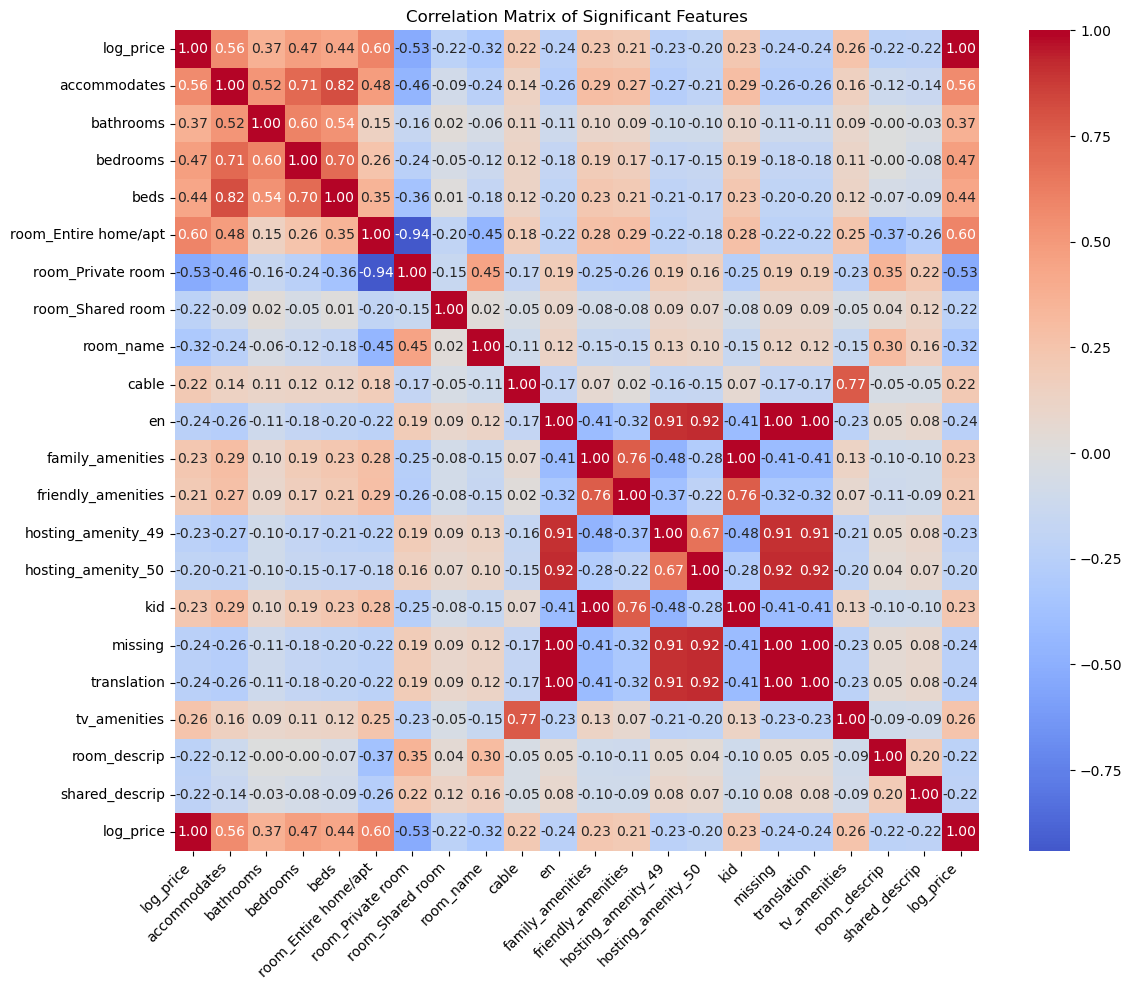

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for all variables
correlation_matrix = train_data_fillna.corr()

# Extract correlations with 'log_price' and convert them into a DataFrame
correlation_with_price = correlation_matrix['log_price'].reset_index()
correlation_with_price.columns = ['feature', 'correlation']

# Filter to display only features with an absolute correlation greater than 0.2
significant_features = correlation_with_price[abs(correlation_with_price['correlation']) > 0.2]

# Extract the list of significant features along with 'log_price'
significant_features_list = significant_features['feature'].tolist()
significant_features_list.append('log_price')

# Extract the sub-correlation matrix for these significant features
significant_correlation_matrix = correlation_matrix.loc[significant_features_list, significant_features_list]

# Create the heatmap
plt.figure(figsize=(12, 10))  # Increase the figure size
sns.heatmap(significant_correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', annot_kws={"size": 10})

# Adjust the rotation of labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Significant Features")
plt.tight_layout()  
plt.show()

In [60]:
from sklearn.decomposition import PCA

Explained variance by each principal component:
[0.17397248 0.12575846 0.11666549 0.0557711  0.05326905 0.04665908
 0.0357284  0.02261545 0.01851376 0.01612679]
Top loadings for PC1:
accommodates    0.484208
beds            0.479347
bedrooms        0.464609
bathrooms       0.406741
longitude       0.204079
Name: PC1, dtype: float64
Top loadings for PC2:
days_since_last_review     0.508323
days_since_first_review    0.505892
latitude                   0.392513
longitude                  0.376469
number_of_reviews          0.227761
Name: PC2, dtype: float64
Top loadings for PC3:
longitude                  0.469105
latitude                   0.462854
days_since_last_review     0.394067
days_since_first_review    0.392942
number_of_reviews          0.246278
Name: PC3, dtype: float64
Top loadings for PC4:
days_since_host_since      0.862042
review_scores_rating       0.413098
number_of_reviews          0.259805
host_has_profile_pic       0.080587
days_since_first_review    0.065005
Name: PC

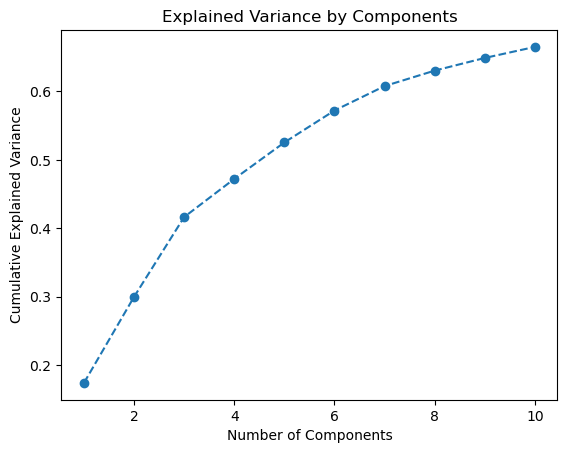

In [61]:
# Remove the 'id' and 'log_price' columns as they should not be used in PCA
train_data_no_id = train_data_fillna.drop(['id', 'log_price'], axis=1)

# Initialize PCA with 10 components
pca = PCA(n_components=10)
pca_results = pca.fit_transform(train_data_no_id)

# Retrieve the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
print("Explained variance by each principal component:")
print(explained_variance)

# Create a DataFrame for the principal component loadings
components_df = pd.DataFrame(pca.components_, columns=train_data_no_id.columns, index=[f"PC{i+1}" for i in range(10)])

# Display the highest loadings to identify key variables for the first principal components
for i in range(1, 7):  # Display for the first six components
    print(f"Top loadings for PC{i}:")
    print(components_df.loc[f'PC{i}'].abs().nlargest(5))

# Visualize the cumulative explained variance to decide how many components to retain
import matplotlib.pyplot as plt
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

- Based on the explained variance criterion, we could retain only the first three principal components. However, we decided not to follow this approach, as it does not improve the performance of our predictions.

Explained variance by each principal component:
[1.73972482e-01 1.25758464e-01 1.16665494e-01 ... 5.98657070e-35
 3.39011737e-35 3.77391683e-36]
Number of components to explain at least 80.0% of the variance: 37
Top loadings for PC1:
accommodates    0.484208
beds            0.479347
bedrooms        0.464609
bathrooms       0.406741
longitude       0.204079
Name: PC1, dtype: float64
Top loadings for PC2:
days_since_last_review     0.508323
days_since_first_review    0.505892
latitude                   0.392513
longitude                  0.376469
number_of_reviews          0.227761
Name: PC2, dtype: float64
Top loadings for PC3:
longitude                  0.469105
latitude                   0.462854
days_since_last_review     0.394067
days_since_first_review    0.392942
number_of_reviews          0.246278
Name: PC3, dtype: float64
Top loadings for PC4:
days_since_host_since      0.862042
review_scores_rating       0.413098
number_of_reviews          0.259805
host_has_profile_pic       0.

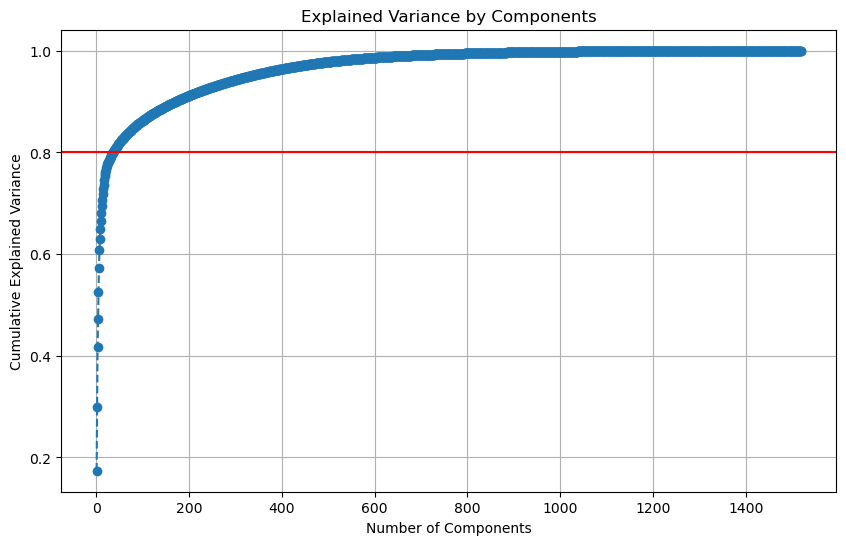

In [63]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Removing the 'id' and 'log_price' columns as they should not be used in PCA
train_data_no_id = train_data_fillna.drop(['id', 'log_price'], axis=1)

# Initializing PCA with all components
pca = PCA()
pca_results = pca.fit_transform(train_data_no_id)

# Retrieving the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Displaying the explained variance
print("Explained variance by each principal component:")
print(explained_variance)

# Calculating the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Finding the number of components needed to explain at least 80% of the variance
threshold = 0.80
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f'Number of components to explain at least {threshold * 100}% of the variance: {num_components}')

# Creating a DataFrame for the principal component loadings up to num_components
components_df = pd.DataFrame(pca.components_[:num_components], columns=train_data_no_id.columns, 
                             index=[f"PC{i+1}" for i in range(num_components)])

# Displaying the highest loadings to identify key variables for the first principal components
for i in range(1, num_components + 1):  # Displaying loadings for components up to num_components
    print(f"Top loadings for PC{i}:")
    print(components_df.loc[f'PC{i}'].abs().nlargest(5))

# Visualizing the cumulative explained variance to decide how many components to retain
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

- Initially, we used the loadings from the first three principal components (PC1, PC2, and PC3) to select significant variables. After further testing, we opted to use the loadings from principal components (PC1 to PC37), representing 80% of the variance, which increased the R² score.

- The loadings allow us to identify the most contributive original variables, thereby retaining crucial information and enhancing model performance by effectively capturing the essential features of the data. This approach improves prediction quality compared to using principal components directly.

- We extended our analysis by selecting variables with an absolute correlation greater than 0.1 with log_price, instead of 0.2, which improved the accuracy of our predictive models by capturing additional relationships.

- The new dataset will be used to train more robust machine learning models, focusing on the most impactful features influencing Airbnb rental prices, enabling more precise estimation. The inclusion of certain principal components can provide additional complementary information.

- To optimize the predictive model, it is crucial to retain variables that are both correlated and contextually relevant to log_price. Some variables, although strongly correlated, were removed due to their lack of relevance: 'indoor', 'use', 'room_name', 'check', 'door', 'en', 'bedroom_name', 'place'.

In [65]:
# List of columns to retain
columns_to_keep = [
    'id', 'log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'room_Entire home/apt', 'latitude', 'longitude', 'room_Private room', 'room_Shared room',
    'cable', 'family_amenities', 'kid', 'tv_descrip', 'shared_descrip',
    'days_since_last_review', 'days_since_first_review', 'number_of_reviews', 'cleaning_fee',
    'bed_Real Bed', 'cancellation_strict', 'city_SF', 'luxury', 'elevator', 'gym', 'fireplace',
    'lock', 'washer_amenities', 'bedrooms_descrip', 'clean_descrip', 'heart_descrip', 'closet', 'train',
    'home_descrip', 'modern_descrip', 'views_descrip', 'friendly_amenities', 'suitable', 'cozy_name', 'private_name', 'high', 'translation',
    'review_scores_rating', 'host_has_profile_pic', 'type_Apartment', 'cancellation_flexible', 'cancellation_moderate', 'host_identity_verified',
    'type_House', 'city_NYC', 'city_LA', 'instant_bookable', 'city_DC', 'city_Chicago', 'neighb_Unknown', 'hosting_amenity_49', 'hosting_amenity_50',
    'type_Condominium', 'city_Boston', 'neighb_Williamsburg', 'williamsburg', 'bed_Futon', 'neighb_Bushwick',
    'neighb_Venice', 'neighb_Bedford-Stuyvesant', 'good', 'love', 'business', 'pets', 'detector',
    'allowed', 'property', 'type_Townhouse', 'bedroom_descrip', 'type_Loft', 'neighb_Hollywood', 'neighb_Upper West Side',
    'village'
]

# Create a new DataFrame with only the desired columns
new_train_data = train_data_fillna[columns_to_keep].copy()

# Display the first few rows of the new DataFrame to verify
new_train_data.head()

,id,log_price,accommodates,bathrooms,bedrooms,beds,room_Entire home/apt,latitude,longitude,room_Private room,...,pets,detector,allowed,property,type_Townhouse,bedroom_descrip,type_Loft,neighb_Hollywood,neighb_Upper West Side,village
0,5708593,4.317488,-0.072568,-0.402096,-1.483500,0.230941,0,-1.523715,-1.193613,1,...,0.243438,0.117636,0.261786,0.0,0,0.105328,0,0,0,0.0
1,14483613,4.007333,0.393889,1.305353,-0.310272,0.230941,0,0.730072,0.847264,1,...,0.000000,0.123545,0.137467,0.0,0,0.076955,0,0,0,0.0
2,10412649,7.090077,1.326802,1.305353,0.862957,0.230941,1,0.147989,0.703181,0,...,0.209504,0.202477,0.225294,0.0,0,0.000000,0,0,0,0.0
3,17954362,3.555348,-1.005481,-0.402096,-0.310272,-0.566378,0,0.740013,0.846581,1,...,0.000000,0.151655,0.000000,0.0,0,0.000000,0,0,0,0.0
4,9969781,5.480639,0.393889,-0.402096,0.862957,0.230941,1,-0.233778,-1.391875,0,...,0.000000,0.180639,0.000000,0.0,0,0.000000,0,0,0,0.0


In [66]:
new_train_data.dtypes

id                          int64
log_price                 float64
accommodates              float64
bathrooms                 float64
bedrooms                  float64
                           ...   
bedroom_descrip           float64
type_Loft                   int32
neighb_Hollywood            int32
neighb_Upper West Side      int32
village                   float64
Length: 79, dtype: object

## Step 6: Preparing the Test Dataset in the Same Way as the Train Dataset for Predicting the Logarithm of Prices

- Similar to the training dataset, we handled missing values, converted textual data into formats usable by machine learning algorithms, and normalized numerical data. We then created a new test dataset by retaining only the significant variables, following the same steps and methodologies applied earlier.

- This consistent approach ensures alignment between our training and test datasets, thereby optimizing the accuracy of predictions on unseen data.

In [68]:
# Path to the test dataset file
test_data_path = 'airbnb_test.csv'

# Load the test dataset into a pandas DataFrame
test_data = pd.read_csv(test_data_path)

# Display the first few rows to get an overview of the data
test_data.head()

,Unnamed: 0,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,14282777,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,17029381,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7824740,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,19811650,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117.0,2.0,2.0
4,12410741,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


In [69]:
# Calculate the number of missing values per column
print(test_data.isnull().sum())

Unnamed: 0                    0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   149
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              11139
host_has_profile_pic        132
host_identity_verified      132
host_response_rate        12824
host_since                  132
instant_bookable              0
last_review               11111
latitude                      0
longitude                     0
name                          0
neighbourhood              4786
number_of_reviews             0
review_scores_rating      11744
zipcode                     663
bedrooms                     65
beds                         96
dtype: int64


In [70]:
# Rename the column 'Unnamed: 0' to 'id'
test_data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

# Display the first few rows to confirm the change
test_data.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,14282777,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,17029381,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7824740,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,19811650,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117.0,2.0,2.0
4,12410741,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


In [71]:
# Check if the column is already of type float or has NaN values causing issues
if test_data['host_response_rate'].dtype == 'object':
    # Remove the '%' symbol and convert to float only if it's a string
    test_data['host_response_rate'] = test_data['host_response_rate'].str.rstrip('%').astype('float') / 100

# Calculate the median for 'host_response_rate'
host_response_rate_median = test_data['host_response_rate'].median()

# The variables 'host_response_rate' and 'review_scores_rating' reflect the host's engagement and perceived quality.
# Using the median for these variables helps provide a balanced and reliable estimate.
# Replace missing values in 'host_response_rate' with the median
test_data['host_response_rate'].fillna(host_response_rate_median, inplace=True)

# Assuming the median for 'review_scores_rating' has been calculated similarly without errors
review_scores_rating_median = test_data['review_scores_rating'].median()
test_data['review_scores_rating'].fillna(review_scores_rating_median, inplace=True)

# Replace missing values with the median
# The variables 'bathrooms', 'bedrooms', and 'beds' are essential for determining the capacity and comfort of accommodations.
# The median is used here to minimize the impact of extreme values.
for column in ['bathrooms', 'bedrooms', 'beds']:
    median_value = train_data[column].median()
    test_data[column].fillna(median_value, inplace=True)

# Imputation with 'Unknown'
# For categorical variables 'host_has_profile_pic', 'host_identity_verified', and 'zipcode',
# replacing missing values with 'Unknown' helps maintain clarity in the analysis by clearly indicating missing information.
for column in ['host_has_profile_pic', 'host_identity_verified', 'zipcode']:
    test_data[column].fillna('Unknown', inplace=True)
    
# Replace NaN values in 'neighbourhood' with 'Unknown'
test_data['neighbourhood'].fillna('Unknown', inplace=True)

# Convert columns to datetime, if they are not already, for 'host_since', 'last_review', 'first_review'
test_data['first_review'] = pd.to_datetime(test_data['first_review'], errors='coerce')
test_data['last_review'] = pd.to_datetime(test_data['last_review'], errors='coerce')
test_data['host_since'] = pd.to_datetime(test_data['host_since'], errors='coerce')

# Replace missing values with an extreme date (January 1, 1900)
# Using an extreme date clearly identifies data where original information was missing
extreme_date = pd.to_datetime('1900-01-01')
test_data['first_review'].fillna(extreme_date, inplace=True)
test_data['last_review'].fillna(extreme_date, inplace=True)
test_data['host_since'].fillna(extreme_date, inplace=True)

# Save the cleaned test dataset to a new CSV file
test_data.to_csv('airbnb_test_cleaned.csv', index=False)


In [72]:
# Path to the cleaned test dataset file
test_data_fillno = 'airbnb_test_cleaned.csv'

# Load the cleaned test dataset into a pandas DataFrame
test_data_fillna = pd.read_csv(test_data_fillno)

# Display the first few rows to get an overview of the data
test_data_fillna.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,14282777,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,17029381,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7824740,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,19811650,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,1900-01-01,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,96.0,94117.0,2.0,2.0
4,12410741,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


In [73]:
# Calculate the number of missing values per column
print(test_data_fillna.isnull().sum())

id                        0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


In [74]:
# Convert columns to datetime format if not already
date_columns = ['first_review', 'last_review', 'host_since']
for column in date_columns:
    if column in test_data_fillna.columns:
        test_data_fillna[column] = pd.to_datetime(test_data_fillna[column], errors='coerce')

# Calculate the number of days since today
today = pd.to_datetime('today')
if 'first_review' in test_data_fillna.columns:
    test_data_fillna['days_since_first_review'] = (today - test_data_fillna['first_review']).dt.days
if 'last_review' in test_data_fillna.columns:
    test_data_fillna['days_since_last_review'] = (today - test_data_fillna['last_review']).dt.days
if 'host_since' in test_data_fillna.columns:
    test_data_fillna['days_since_host_since'] = (today - test_data_fillna['host_since']).dt.days

# Drop original date columns to reduce dataset size
for column in date_columns:
    if column in test_data_fillna.columns:
        test_data_fillna.drop(column, axis=1, inplace=True)

# Define a function to normalize boolean values
# This function takes a value and returns 'True', 'False', or 'Unknown' based on the initial format
def normalize_boolean(value):
    if value in ['t', 'True', True]:  # Representations of 'True'
        return 'True'
    elif value in ['f', 'False', False]:  # Representations of 'False'
        return 'False'
    else:  # For null, erroneous, or other cases, return 'Unknown'
        return 'Unknown'

# List of columns to normalize with boolean values and "Unknown"
columns_to_normalize = ['instant_bookable', 'host_has_profile_pic', 'host_identity_verified', 'cleaning_fee']

# Apply the normalization function to each relevant column
for column in columns_to_normalize:
    test_data_fillna[column] = test_data_fillna[column].apply(normalize_boolean)

# Define a function to encode 'True', 'False', and 'Unknown' into numeric values
def encode_boolean_unknown(column):
    return column.map({'True': 1, 'False': 0, 'Unknown': -1})

# Apply the encoding function to each normalized column
for column in columns_to_normalize:
    test_data_fillna[column] = encode_boolean_unknown(test_data_fillna[column])


In [75]:
# Display the first few rows of the modified columns to verify that encoding is correct
test_data_fillna[['days_since_first_review', 'days_since_last_review', 'days_since_host_since']].head()

,days_since_first_review,days_since_last_review,days_since_host_since
0,3128,3098,4673
1,2715,2666,2762
2,2812,2675,2999
3,45665,45665,3554
4,3531,2910,3603


In [76]:
# Display the first few rows of the columns 'instant_bookable', 'host_has_profile_pic', 'host_identity_verified', 'cleaning_fee'
test_data_fillna[['instant_bookable', 'host_has_profile_pic', 'host_identity_verified', 'cleaning_fee']].head()

,instant_bookable,host_has_profile_pic,host_identity_verified,cleaning_fee
0,0,1,1,1
1,1,1,0,1
2,1,1,1,1
3,0,1,1,1
4,1,1,1,1


In [77]:
# Check if the 'room_type' column exists before applying get_dummies
if 'room_type' in test_data_fillna.columns:
    test_data_fillna = pd.get_dummies(test_data_fillna, columns=['room_type'], prefix='room')
    rooms_columns = ['room_Entire home/apt', 'room_Private room', 'room_Shared room']
    for col in rooms_columns:
        if col in test_data_fillna.columns and test_data_fillna[col].dtype == 'bool':
            test_data_fillna[col] = test_data_fillna[col].astype(int)

# Check and process the 'bed_type' column
if 'bed_type' in test_data_fillna.columns:
    test_data_fillna = pd.get_dummies(test_data_fillna, columns=['bed_type'], prefix='bed')
    bed_columns = ['bed_Real Bed', 'bed_Pull-out Sofa', 'bed_Futon', 'bed_Airbed', 'bed_Couch']
    for col in bed_columns:
        if col in test_data_fillna.columns and test_data_fillna[col].dtype == 'bool':
            test_data_fillna[col] = test_data_fillna[col].astype(int)

# Check and process the 'cancellation_policy' column
if 'cancellation_policy' in test_data_fillna.columns:
    test_data_fillna = pd.get_dummies(test_data_fillna, columns=['cancellation_policy'], prefix='cancellation')
    cancellation_columns = ['cancellation_flexible', 'cancellation_strict', 'cancellation_moderate', 'cancellation_super_strict_30', 'cancellation_super_strict_60']
    for col in cancellation_columns:
        if col in test_data_fillna.columns and test_data_fillna[col].dtype == 'bool':
            test_data_fillna[col] = test_data_fillna[col].astype(int)

# Check and process the 'city' column
if 'city' in test_data_fillna.columns:
    test_data_fillna = pd.get_dummies(test_data_fillna, columns=['city'], prefix='city')
    city_columns = ['city_LA', 'city_NYC', 'city_DC', 'city_SF', 'city_Chicago', 'city_Boston']
    for col in city_columns:
        if col in test_data_fillna.columns and test_data_fillna[col].dtype == 'bool':
            test_data_fillna[col] = test_data_fillna[col].astype(int)

# Check and process the 'property_type' column
if 'property_type' in test_data_fillna.columns:
    test_data_fillna = pd.get_dummies(test_data_fillna, columns=['property_type'], prefix='type')
    property_columns = [col for col in test_data_fillna.columns if col.startswith('type_')]
    for col in property_columns:
        if col in test_data_fillna.columns and test_data_fillna[col].dtype == 'bool':
            test_data_fillna[col] = test_data_fillna[col].astype(int)

# Check and process the 'neighbourhood' column
if 'neighbourhood' in test_data_fillna.columns:
    test_data_fillna = pd.get_dummies(test_data_fillna, columns=['neighbourhood'], prefix='neighb')
    neighb_columns = [col for col in test_data_fillna.columns if col.startswith('neighb_')]
    for col in neighb_columns:
        if col in test_data_fillna.columns and test_data_fillna[col].dtype == 'bool':
            test_data_fillna[col] = test_data_fillna[col].astype(int)

# Display the first few rows to verify the modifications
test_data_fillna.head()



,id,amenities,accommodates,bathrooms,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,...,neighb_Windsor Terrace,neighb_Winnetka,neighb_Winthrop,neighb_Woodhaven,neighb_Woodland Hills/Warner Center,neighb_Woodlawn,neighb_Woodley Park,neighb_Woodridge,neighb_Woodside,neighb_Wrigleyville
0,14282777,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,1,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,17029381,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1,Enjoy travelling during your stay in Manhattan...,1,0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,7824740,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1,The Oasis comes complete with a full backyard ...,1,1,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,19811650,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1,This light-filled home-away-from-home is super...,1,1,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,12410741,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,"Cool, cozy, and comfortable studio located in ...",1,1,1.0,1,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Display the first few rows of the columns 'room_Entire home/apt', 'room_Private room', 'room_Shared room'
test_data_fillna[['room_Entire home/apt', 'room_Private room', 'room_Shared room']].head()


,room_Entire home/apt,room_Private room,room_Shared room
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [79]:
# Display the first few rows of the columns 'Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'
test_data_fillna[['bed_Real Bed','bed_Pull-out Sofa','bed_Futon','bed_Airbed','bed_Couch']].head()

,bed_Real Bed,bed_Pull-out Sofa,bed_Futon,bed_Airbed,bed_Couch
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [80]:
# Display the first few rows of the columns 'flexible', 'strict', 'moderate', 'super_strict_30', 'super_strict_60'
test_data_fillna[['cancellation_flexible','cancellation_strict','cancellation_moderate','cancellation_super_strict_30','cancellation_super_strict_60']].head()

,cancellation_flexible,cancellation_strict,cancellation_moderate,cancellation_super_strict_30,cancellation_super_strict_60
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [81]:
# Display the first few rows of the columns 'LA', 'NYC', 'DC', 'SF', 'Chicago', 'Boston'
test_data_fillna[['city_LA','city_NYC','city_DC','city_SF','city_Chicago','city_Boston']].head()

,city_LA,city_NYC,city_DC,city_SF,city_Chicago,city_Boston
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [82]:
# Display the first few rows of columns related to 'property_type'
test_data_fillna.filter(regex='type_').head()  

,type_Apartment,type_Bed & Breakfast,type_Boat,type_Boutique hotel,type_Bungalow,type_Cabin,type_Camper/RV,type_Casa particular,type_Castle,type_Cave,...,type_Serviced apartment,type_Tent,type_Timeshare,type_Tipi,type_Townhouse,type_Train,type_Treehouse,type_Vacation home,type_Villa,type_Yurt
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Display the first few rows of columns related to 'neighbourhood'
test_data_fillna.filter(regex='neighb_').head()

,neighb_16th Street Heights,neighb_Adams Morgan,neighb_Alamo Square,neighb_Albany Park,neighb_Alhambra,neighb_Allerton,neighb_Allston-Brighton,neighb_Alondra Park,neighb_Alphabet City,neighb_Altadena,...,neighb_Windsor Terrace,neighb_Winnetka,neighb_Winthrop,neighb_Woodhaven,neighb_Woodland Hills/Warner Center,neighb_Woodlawn,neighb_Woodley Park,neighb_Woodridge,neighb_Woodside,neighb_Wrigleyville
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Apply TF-IDF Vectorizer to the 'name' column
# Text cleaning
# Convert to lowercase
test_data_fillna['name_clean'] = test_data_fillna['name'].str.lower() 
# Remove non-alphanumeric characters
test_data_fillna['name_clean'] = test_data_fillna['name_clean'].apply(lambda x: re.sub(r'\W+', ' ', x))  

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Apply TF-IDF to the 'name_clean' column
tfidf_matrix = tfidf.fit_transform(test_data_fillna['name_clean'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Rename some variables derived from the 'name' column to avoid repetition and improve clarity

if 'bedroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedroom': 'bedroom_name'}, inplace=True)
if 'bedrooms' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedrooms': 'bedrooms_name'}, inplace=True)
if 'room' in tfidf_df.columns:
    tfidf_df.rename(columns={'room': 'room_name'}, inplace=True)
if 'tv' in tfidf_df.columns:
    tfidf_df.rename(columns={'tv': 'tv_name'}, inplace=True)
if 'shared' in tfidf_df.columns:
    tfidf_df.rename(columns={'shared': 'shared_name'}, inplace=True)
if 'family' in tfidf_df.columns:
    tfidf_df.rename(columns={'family': 'family_name'}, inplace=True)
if 'city' in tfidf_df.columns:
    tfidf_df.rename(columns={'city': 'city_name'}, inplace=True)
if 'clean' in tfidf_df.columns:
    tfidf_df.rename(columns={'clean': 'clean_name'}, inplace=True)
if 'cozy' in tfidf_df.columns:
    tfidf_df.rename(columns={'cozy': 'cozy_name'}, inplace=True)
if 'heart' in tfidf_df.columns:
    tfidf_df.rename(columns={'heart': 'heart_name'}, inplace=True)
if 'home' in tfidf_df.columns:
    tfidf_df.rename(columns={'home': 'home_name'}, inplace=True)
if 'modern' in tfidf_df.columns:
    tfidf_df.rename(columns={'modern': 'modern_name'}, inplace=True)
if 'private' in tfidf_df.columns:
    tfidf_df.rename(columns={'private': 'private_name'}, inplace=True)
if 'views' in tfidf_df.columns:
    tfidf_df.rename(columns={'views': 'views_name'}, inplace=True)
if 'washer' in tfidf_df.columns:
    tfidf_df.rename(columns={'washer': 'washer_name'}, inplace=True)
if 'bathroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bathroom': 'bathroom_name'}, inplace=True)
if 'dryer' in tfidf_df.columns:
    tfidf_df.rename(columns={'dryer': 'dryer_name'}, inplace=True)
if 'friendly' in tfidf_df.columns:
    tfidf_df.rename(columns={'friendly': 'friendly_name'}, inplace=True)
if 'beach' in tfidf_df.columns:
    tfidf_df.rename(columns={'beach': 'beach_name'}, inplace=True)
if 'hollywood' in tfidf_df.columns:
    tfidf_df.rename(columns={'hollywood': 'hollywood_name'}, inplace=True)

# Concatenate the TF-IDF DataFrame with the original dataset
test_data_fillna.reset_index(drop=True, inplace=True)  
test_data_fillna = pd.concat([test_data_fillna, tfidf_df], axis=1)

# Drop the 'name_clean' column to reduce dataset size 
test_data_fillna.drop(['name_clean'], axis=1, inplace=True)


In [85]:
# Display the first few rows to verify the transformations
print(tfidf.get_feature_names_out())

['1br' '2br' 'amazing' 'apartment' 'apt' 'bath' 'bathroom' 'bdrm' 'beach'
 'beautiful' 'bed' 'bedroom' 'best' 'big' 'boston' 'br' 'bright'
 'brooklyn' 'brownstone' 'bungalow' 'bushwick' 'capitol' 'central'
 'charming' 'city' 'clean' 'close' 'comfortable' 'comfy' 'condo' 'cozy'
 'cute' 'dc' 'downtown' 'duplex' 'east' 'entire' 'family' 'flat' 'floor'
 'garden' 'gorgeous' 'great' 'guest' 'harlem' 'heart' 'heights' 'hill'
 'hills' 'historic' 'hollywood' 'home' 'house' 'huge' 'la' 'large'
 'living' 'location' 'loft' 'los' 'lovely' 'luxury' 'manhattan' 'master'
 'midtown' 'min' 'mission' 'modern' 'near' 'new' 'nyc' 'oasis' 'park'
 'parking' 'penthouse' 'perfect' 'place' 'pool' 'prime' 'private' 'quiet'
 'renovated' 'retreat' 'room' 'space' 'spacious' 'square' 'steps' 'studio'
 'suite' 'sunny' 'townhouse' 'upper' 'venice' 'view' 'views' 'village'
 'walk' 'west' 'williamsburg']


In [86]:
# Apply TF-IDF Vectorizer to the 'amenities' column
# Text cleaning
# Convert to lowercase
test_data_fillna['amenities_clean'] = test_data_fillna['amenities'].str.lower() 
# Remove non-alphanumeric characters
test_data_fillna['amenities_clean'] = test_data_fillna['amenities_clean'].apply(lambda x: re.sub(r'\W+', ' ', x))  

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Apply TF-IDF to the 'amenities_clean' column
tfidf_matrix = tfidf.fit_transform(test_data_fillna['amenities_clean'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Rename some variables derived from the 'amenities' column to avoid repetition and improve clarity
if 'bedroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedroom': 'bedroom_amenities'}, inplace=True)
if 'bedrooms' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedrooms': 'bedrooms_amenities'}, inplace=True)
if 'room' in tfidf_df.columns:
    tfidf_df.rename(columns={'room': 'room_amenities'}, inplace=True)
if 'tv' in tfidf_df.columns:
    tfidf_df.rename(columns={'tv': 'tv_amenities'}, inplace=True)
if 'shared' in tfidf_df.columns:
    tfidf_df.rename(columns={'shared': 'shared_amenities'}, inplace=True)
if 'family' in tfidf_df.columns:
    tfidf_df.rename(columns={'family': 'family_amenities'}, inplace=True)
if 'city' in tfidf_df.columns:
    tfidf_df.rename(columns={'city': 'city_amenities'}, inplace=True)
if 'clean' in tfidf_df.columns:
    tfidf_df.rename(columns={'clean': 'clean_amenities'}, inplace=True)
if 'cozy' in tfidf_df.columns:
    tfidf_df.rename(columns={'cozy': 'cozy_amenities'}, inplace=True)
if 'heart' in tfidf_df.columns:
    tfidf_df.rename(columns={'heart': 'heart_amenities'}, inplace=True)
if 'home' in tfidf_df.columns:
    tfidf_df.rename(columns={'home': 'home_amenities'}, inplace=True)
if 'modern' in tfidf_df.columns:
    tfidf_df.rename(columns={'modern': 'modern_amenities'}, inplace=True)
if 'private' in tfidf_df.columns:
    tfidf_df.rename(columns={'private': 'private_amenities'}, inplace=True)
if 'views' in tfidf_df.columns:
    tfidf_df.rename(columns={'views': 'views_amenities'}, inplace=True)
if 'washer' in tfidf_df.columns:
    tfidf_df.rename(columns={'washer': 'washer_amenities'}, inplace=True)
if 'bathroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bathroom': 'bathroom_amenities'}, inplace=True)
if 'dryer' in tfidf_df.columns:
    tfidf_df.rename(columns={'dryer': 'dryer_amenities'}, inplace=True)
if 'friendly' in tfidf_df.columns:
    tfidf_df.rename(columns={'friendly': 'friendly_amenities'}, inplace=True)
if 'beach' in tfidf_df.columns:
    tfidf_df.rename(columns={'beach': 'beach_amenities'}, inplace=True)
if 'hollywood' in tfidf_df.columns:
    tfidf_df.rename(columns={'hollywood': 'hollywood_amenities'}, inplace=True)

# Concatenate the TF-IDF DataFrame with the original dataset
test_data_fillna.reset_index(drop=True, inplace=True)
test_data_fillna = pd.concat([test_data_fillna, tfidf_df], axis=1)

# Drop the 'amenities_clean' column to reduce dataset size 
test_data_fillna.drop(['amenities_clean'], axis=1, inplace=True)


In [87]:
# Display the first few rows to verify the transformations
print(tfidf.get_feature_names_out())

['24' 'access' 'accessible' 'aid' 'air' 'allowed' 'basics' 'bathtub' 'bed'
 'bedroom' 'blankets' 'breakfast' 'building' 'buzzer' 'cable' 'carbon'
 'card' 'cat' 'check' 'children' 'coffee' 'conditioning' 'cooking'
 'detector' 'dishes' 'dishwasher' 'dog' 'door' 'doorman' 'dropoff' 'dryer'
 'elevator' 'en' 'entrance' 'essentials' 'events' 'extinguisher' 'extra'
 'family' 'fireplace' 'free' 'friendly' 'gym' 'hair' 'hangers' 'heating'
 'hosting_amenity_49' 'hosting_amenity_50' 'hot' 'hour' 'indoor'
 'intercom' 'internet' 'iron' 'keypad' 'kid' 'kit' 'kitchen' 'laptop'
 'linens' 'live' 'living' 'lock' 'lockbox' 'long' 'luggage' 'maker'
 'microwave' 'missing' 'monoxide' 'oven' 'parking' 'pets' 'pillows' 'pool'
 'premises' 'private' 'property' 'refrigerator' 'room' 'safety' 'self'
 'shampoo' 'silverware' 'smoke' 'smoking' 'stays' 'step' 'stove'
 'suitable' 'term' 'translation' 'tub' 'tv' 'washer' 'water' 'wheelchair'
 'wide' 'wireless' 'workspace']


In [88]:
# Apply TF-IDF Vectorizer to the 'description' column
# Text cleaning
# Convert to lowercase
test_data_fillna['description_clean'] = test_data_fillna['description'].str.lower() 
# Remove non-alphanumeric characters
test_data_fillna['description_clean'] = test_data_fillna['description_clean'].apply(lambda x: re.sub(r'\W+', ' ', x))  

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Apply TF-IDF to the 'description_clean' column
tfidf_matrix = tfidf.fit_transform(test_data_fillna['description_clean'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Rename columns derived from 'description' to avoid redundancy and improve clarity
if 'bedroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedroom': 'bedroom_descrip'}, inplace=True)
if 'bedrooms' in tfidf_df.columns:
    tfidf_df.rename(columns={'bedrooms': 'bedrooms_descrip'}, inplace=True)
if 'room' in tfidf_df.columns:
    tfidf_df.rename(columns={'room': 'room_descrip'}, inplace=True)
if 'tv' in tfidf_df.columns:
    tfidf_df.rename(columns={'tv': 'tv_descrip'}, inplace=True)
if 'shared' in tfidf_df.columns:
    tfidf_df.rename(columns={'shared': 'shared_descrip'}, inplace=True)
if 'family' in tfidf_df.columns:
    tfidf_df.rename(columns={'family': 'family_descrip'}, inplace=True)
if 'city' in tfidf_df.columns:
    tfidf_df.rename(columns={'city': 'city_descrip'}, inplace=True)
if 'clean' in tfidf_df.columns:
    tfidf_df.rename(columns={'clean': 'clean_descrip'}, inplace=True)
if 'cozy' in tfidf_df.columns:
    tfidf_df.rename(columns={'cozy': 'cozy_descrip'}, inplace=True)
if 'heart' in tfidf_df.columns:
    tfidf_df.rename(columns={'heart': 'heart_descrip'}, inplace=True)
if 'home' in tfidf_df.columns:
    tfidf_df.rename(columns={'home': 'home_descrip'}, inplace=True)
if 'modern' in tfidf_df.columns:
    tfidf_df.rename(columns={'modern': 'modern_descrip'}, inplace=True)
if 'private' in tfidf_df.columns:
    tfidf_df.rename(columns={'private': 'private_descrip'}, inplace=True)
if 'views' in tfidf_df.columns:
    tfidf_df.rename(columns={'views': 'views_descrip'}, inplace=True)
if 'washer' in tfidf_df.columns:
    tfidf_df.rename(columns={'washer': 'washer_descrip'}, inplace=True)
if 'bathroom' in tfidf_df.columns:
    tfidf_df.rename(columns={'bathroom': 'bathroom_descrip'}, inplace=True)
if 'dryer' in tfidf_df.columns:
    tfidf_df.rename(columns={'dryer': 'dryer_descrip'}, inplace=True)
if 'friendly' in tfidf_df.columns:
    tfidf_df.rename(columns={'friendly': 'friendly_descript'}, inplace=True)
if 'beach' in tfidf_df.columns:
    tfidf_df.rename(columns={'beach': 'beach_descrip'}, inplace=True)
if 'hollywood' in tfidf_df.columns:
    tfidf_df.rename(columns={'hollywood': 'hollywood_descrip'}, inplace=True)

# Concatenate the TF-IDF DataFrame with the original dataset
test_data_fillna.reset_index(drop=True, inplace=True)
test_data_fillna = pd.concat([test_data_fillna, tfidf_df], axis=1)

# Drop the 'description_clean' column to optimize the dataset
test_data_fillna.drop(['description_clean'], axis=1, inplace=True)


In [89]:
# Display the first few rows to verify the transformations
print(tfidf.get_feature_names_out())

['10' 'access' 'apartment' 'area' 'available' 'away' 'bars' 'bath'
 'bathroom' 'beach' 'beautiful' 'bed' 'bedroom' 'bedrooms' 'best' 'block'
 'blocks' 'brooklyn' 'building' 'bus' 'business' 'center' 'central' 'city'
 'clean' 'close' 'closet' 'coffee' 'comfortable' 'cozy' 'dining'
 'distance' 'downtown' 'dryer' 'easy' 'enjoy' 'floor' 'free' 'fully'
 'good' 'great' 'guest' 'guests' 'heart' 'high' 'hollywood' 'home' 'house'
 'just' 'kitchen' 'la' 'large' 'laundry' 'light' 'like' 'living' 'll'
 'located' 'location' 'love' 'manhattan' 'min' 'minute' 'minutes' 'modern'
 'need' 'neighborhood' 'new' 'park' 'parking' 'people' 'perfect' 'place'
 'private' 'queen' 'quiet' 'restaurants' 'right' 'room' 'shared'
 'shopping' 'shops' 'size' 'space' 'spacious' 'square' 'station' 'stay'
 'street' 'studio' 'subway' 'train' 'tv' 'unit' 'use' 'views' 'walk'
 'walking' 'washer' 'wifi']


In [90]:
# Drop original text columns that are no longer needed
test_data_fillna.drop(['name', 'description', 'amenities'], axis=1, inplace=True)

In [91]:
test_data_fillna.head()

,id,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,...,subway,train,tv_descrip,unit,use,views_descrip,walk,walking,washer_descrip,wifi
0,14282777,3,1.0,1,1,1,1.0,0,40.696524,-73.991617,...,0.000000,0.0,0.0,0.000000,0.0,0.325178,0.000000,0.000000,0.0,0.0
1,17029381,7,1.0,1,1,0,1.0,1,40.766115,-73.989040,...,0.137413,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.123031,0.0,0.0
2,7824740,5,1.0,1,1,1,1.0,1,40.808110,-73.943756,...,0.000000,0.0,0.0,0.731906,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,19811650,4,1.0,1,1,1,1.0,0,37.772004,-122.431619,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,12410741,2,1.0,1,1,1,1.0,1,38.925627,-77.034596,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.299411,0.000000,0.0,0.0


In [92]:
# List of columns to standardize
columns_to_scale = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 
                    'review_scores_rating', 'days_since_first_review', 'days_since_last_review', 
                    'days_since_host_since', 'latitude', 'longitude']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected columns
test_data_fillna[columns_to_scale] = scaler.fit_transform(test_data_fillna[columns_to_scale])


In [93]:
columns_to_keep = [
    'id', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'room_Entire home/apt', 'latitude', 'longitude', 'room_Private room', 'room_Shared room',
    'cable', 'family_amenities', 'kid', 'tv_descrip', 'shared_descrip',
    'days_since_last_review', 'days_since_first_review', 'number_of_reviews', 'cleaning_fee',
    'bed_Real Bed', 'cancellation_strict', 'city_SF', 'luxury', 'elevator', 'gym', 'fireplace',
    'lock', 'washer_amenities', 'bedrooms_descrip', 'clean_descrip', 'heart_descrip', 'closet', 'train',
    'home_descrip', 'modern_descrip', 'views_descrip','friendly_amenities','suitable','cozy_name','private_name','high','translation',
    'review_scores_rating','host_has_profile_pic','type_Apartment','cancellation_flexible','cancellation_moderate','host_identity_verified',
    'type_House','city_NYC','city_LA','instant_bookable','city_DC','city_Chicago','neighb_Unknown','hosting_amenity_49','hosting_amenity_50',
    'type_Condominium','city_Boston','neighb_Williamsburg','williamsburg','bed_Futon','neighb_Bushwick',
    'neighb_Venice','neighb_Bedford-Stuyvesant','good','love','business','pets','detector',
    'allowed','property','type_Townhouse','bedroom_descrip','type_Loft','neighb_Hollywood','neighb_Upper West Side',
    'village'
]

# Create a new DataFrame with only the desired columns
new_test_data = test_data_fillna[columns_to_keep].copy()

# Display the first few rows of the new DataFrame to verify
new_test_data.head()

,id,accommodates,bathrooms,bedrooms,beds,room_Entire home/apt,latitude,longitude,room_Private room,room_Shared room,...,pets,detector,allowed,property,type_Townhouse,bedroom_descrip,type_Loft,neighb_Hollywood,neighb_Upper West Side,village
0,14282777,-0.071817,-0.404214,-0.312317,-0.566064,1,0.732175,0.849941,0,0,...,0.0,0.000000,0.0,0.0,0,0.175373,0,0,0,0.0
1,17029381,1.781974,-0.404214,2.036833,1.030071,1,0.754742,0.850059,0,0,...,0.0,0.156917,0.0,0.0,0,0.000000,0,0,0,0.0
2,7824740,0.855078,-0.404214,-0.312317,1.030071,1,0.768360,0.852144,0,0,...,0.0,0.230390,0.0,0.0,0,0.000000,0,0,0,0.0
3,19811650,0.391631,-0.404214,0.862258,0.232004,1,-0.216184,-1.380244,0,0,...,0.0,0.260995,0.0,0.0,0,0.000000,0,0,0,0.0
4,12410741,-0.535265,-0.404214,-1.486893,-0.566064,1,0.157911,0.709842,0,0,...,0.0,0.337566,0.0,0.0,0,0.000000,0,0,0,0.0


In [94]:
# Check the data types of the columns 
print(new_test_data.dtypes)

id                          int64
accommodates              float64
bathrooms                 float64
bedrooms                  float64
beds                      float64
                           ...   
bedroom_descrip           float64
type_Loft                   int32
neighb_Hollywood            int32
neighb_Upper West Side      int32
village                   float64
Length: 78, dtype: object


## Step 7: Develop and Train Various Machine Learning Models to Predict Log-Price


- Type : Linear Model
- ElasticNet is a linear regression model that combines L1 regularization (Lasso) and L2 regularization (Ridge). It is particularly useful when you have many features and suspect that some of them may be redundant or non-informative. ElasticNet adds a penalty that combines the Lasso and Ridge penalties, which helps to manage multicollinearity and selects features in a more robust way.

In [97]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Prepare the data
# Drop irrelevant columns for training
X = new_train_data.drop(columns=["log_price", "id"])  
y = new_train_data["log_price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
# StandardScaler is used to center the data (mean = 0) and scale it (standard deviation = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Elastic Net model
# ElasticNet is a mixed regularization between Lasso (L1) and Ridge (L2)
model = ElasticNet(alpha=0.1, l1_ratio=0.7)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the training and test sets
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Print the R² scores to evaluate the model performance
print(f"Training score: {r2_score(y_train, y_pred_train)}")
print(f"Test score: {r2_score(y_test, y_pred_test)}")

# Calculate and print MSE for the test set
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error: {mse}")



Training score: 0.49828998464386387
Test score: 0.49902721717973175
Mean Squared Error: 0.2566454511563596


- Type: Non-linear Model
- The DecisionTreeRegressor is a non-linear regression model that uses a decision tree to predict a target variable. A decision tree is a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf represents a prediction value. The model works by recursively partitioning the data into homogeneous subsets with respect to the target variable.

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Prepare the data
# The "id" column is correctly removed as it is unnecessary
X = new_train_data.drop(columns=["log_price", "id"])  
y = new_train_data["log_price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
# StandardScaler is used to center the data (mean = 0) and scale it (standard deviation = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the training and test sets
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)

# Print the R² scores to evaluate the model performance
print(f"Training score: {r2_score(y_train, y_pred_train)}")
print(f"Test score: {r2_score(y_test, y_pred_test)}")

# Calculate and print MSE for the test set
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error: {mse}")



Training score: 0.5585878340373557
Test score: 0.5342923226017138
Mean Squared Error: 0.23857934217504956


- Type: Linear Model
- The LinearSVR is a regression model based on support vector machines (SVM) for regression problems, but with a linear decision function. Unlike SVR, which can use non-linear kernels, LinearSVR is specifically optimized for problems where the relationship between features and the target variable is linear.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score, mean_squared_error

# Excluding the 'ID' column and preparing the data
X = new_train_data.drop(columns=["log_price", "id"])  
y = new_train_data["log_price"]

# Splitting the data into training and test sets
# 20% of the data is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
# StandardScaler is used to center the data (mean = 0) and scale it (standard deviation = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the LinearSVR model
model = LinearSVR(C=1.0, epsilon=0.0, max_iter=10000)
model.fit(X_train, y_train)

# Predicting on the training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Displaying R² scores to evaluate the model's performance
print(f"Training Score: {r2_score(y_train, y_pred_train)}")
print(f"Test Score: {r2_score(y_test, y_pred_test)}")

# Displaying the Mean Squared Error (MSE)
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test)}")

Training Score: 0.6104412326747388
Test Score: 0.6030507795263531
Test MSE: 0.20335478346969135


- Type: Non-linear Model
- SVR (Support Vector Regression) is a regression method based on support vector machines (SVM). It is capable of capturing complex relationships by using different types of kernels to transform the input data into a higher-dimensional feature space where a linear relationship can be found. The radial basis function (RBF) kernel is commonly used to capture non-linear relationships.

In [103]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Data preparation
X = new_train_data.drop(columns=["log_price", "id"])  
y = new_train_data["log_price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the training and test sets
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Display R² scores to evaluate the model's performance
print(f"Training Score: {r2_score(y_train, y_pred_train)}")
print(f"Test Score: {r2_score(y_test, y_pred_test)}")

# Display Mean Squared Error (MSE)
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test)}")

Training Score: 0.8108390518077713
Test Score: 0.6258438740996888
Test MSE: 0.19167801331245515


- Type: Non-linear model
- The GradientBoostingRegressor is an ensemble model based on the boosting technique, where multiple weak models (often shallow decision trees) are trained sequentially. Each subsequent model corrects the residual errors of the previous model. The final model is a weighted combination of all the weak models, allowing it to capture complex relationships in the data.

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Data preparation
# Excluding the 'id' column and preparing the data
X = new_train_data.drop(columns=["log_price", "id"])  
y = new_train_data["log_price"]

# Splitting the data into training and test sets
# 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Feature scaling
# StandardScaler is used to center the data (mean = 0) and scale it (standard deviation = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predictions on training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Displaying R² scores to evaluate the model performance
print(f"Training Score: {r2_score(y_train, y_pred_train)}")
print(f"Test Score: {r2_score(y_test, y_pred_test)}")

# Calculating and displaying the Mean Squared Error (MSE)
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test)}")

Training Score: 0.6909752083405892
Test Score: 0.660290265140882
Test MSE: 0.17403132696014068


- Type: Non-linear model
- The RandomForestRegressor is an ensemble model that uses a collection (forest) of decision trees to improve prediction accuracy and reduce the risk of overfitting. Each tree is built from a random sample of the data, and predictions are made by averaging the predictions of all individual trees. The trees are trained in such a way that the correlation between them is minimized, which enhances the robustness and overall performance of the model.

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RandomForestRegressor model
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10, 
    min_samples_split=10,
    min_samples_leaf=4,  
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print R² scores
print(f"Training Score: {r2_score(y_train, y_pred_train)}")
print(f"Test Score: {r2_score(y_test, y_pred_test)}")

# Print Mean Squared Error (MSE)
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test)}")


Training Score: 0.7562327692807689
Test Score: 0.6602520742834757
Test MSE: 0.17405089191489514


- Type: Non-linear model
- The GradientBoostingRegressor is an ensemble model based on the boosting technique, where multiple weak models (often shallow decision trees) are trained sequentially. Each subsequent model corrects the residual errors of the previous model. The final model is a weighted combination of all the weak models, allowing it to capture complex relationships in the data.

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Data Preparation
X = new_train_data.drop(columns=["log_price", "id"])  
y = new_train_data["log_price"]  

# Data Split
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Create the model
# Initialize the Gradient Boosting model
gbm = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)  

# Train the model
# Fit the model to the training data
gbm.fit(X_train, y_train)  

# Predictions and Evaluation
# Make predictions on the test set
y_pred = gbm.predict(X_test) 
# Make predictions on the training set
y_pred_train = gbm.predict(X_train)  

# Displaying R² score (Coefficient of Determination)
# R² score for training data
print(f"Training Score: {r2_score(y_train, y_pred_train)}")  
# R² score for test data
print(f"R² Score on Test Set: {r2_score(y_test, y_pred)}")  

# Displaying Mean Squared Error (MSE)
# MSE for the test data
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")  


Training Score: 0.7211864514168463
R² Score on Test Set: 0.6750767060533422
Test MSE: 0.1664563190373317


In [110]:
!pip install xgboost

- Type: Non-linear model
- The HistGradientBoostingRegressor is a boosting model based on histograms to speed up computations and reduce memory usage. It is particularly useful for large datasets. Like the GradientBoostingRegressor, it combines multiple weak models (decision trees) sequentially, with each model correcting the errors of its predecessors.

In [112]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

# Model creation
hist_gbm = HistGradientBoostingRegressor(max_iter=200, random_state=42)

# Model training
hist_gbm.fit(X_train, y_train)

# Prediction and evaluation
y_pred = hist_gbm.predict(X_test)
y_pred_train = hist_gbm.predict(X_train)

# Displaying the R² scores to evaluate model performance
print(f"Training Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R² Score: {r2_score(y_test, y_pred)}")

# Mean Squared Error (MSE) calculation
from sklearn.metrics import mean_squared_error
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")


Training Score: 0.7833342006067935
Test R² Score: 0.6865724678109772
Test MSE: 0.16056710696064938


- Type: Ensemble Model (Non-linear ensemble):
- The StackingRegressor is an ensemble method that combines multiple base models (estimators) to improve predictive performance. Each base model is trained on the same training data, and then a final model (meta-model) is trained on the predictions of the base models. This allows capturing different perspectives from the base models and combining their strengths.

In [114]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Data preparation
X = new_train_data.drop(columns=["log_price", "id"])
y = new_train_data["log_price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimators, including the HistGradientBoostingRegressor
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='linear')),
    ('xgb', xgb.XGBRegressor(n_estimators=100, objective='reg:squarederror')),
    ('hist_gbm', HistGradientBoostingRegressor(max_iter=200, random_state=42))
]

# Create the stacking model
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=100)
)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = stack_model.predict(X_test)
y_pred_train = stack_model.predict(X_train)

# Displaying R² scores to evaluate model performance
print(f"Training Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R² Score: {r2_score(y_test, y_pred)}")

# Displaying MSE for the test set
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")

Training Score: 0.8602340462382951
Test R² Score: 0.692917796052974
Test MSE: 0.1573164321031558


## Step 8: Model Selection

- When selecting a prediction model, it is important to consider the balance between training and test scores to avoid overfitting. A model with closer training and test scores indicates better generalization, which is crucial for making reliable predictions on new data. Among the models tested, the StackingRegressor stands out as the best-performing model. With a Training Score of 0.86, Test R² Score of 0.69, and a Test MSE of 0.16, it strikes the optimal balance between performance and generalization. In comparison, the HistGradientBoostingRegressor offers a Training Score of 0.78, a Test R² Score of 0.69, and a Test MSE of 0.16, while the GradientBoostingRegressor shows a Training Score of 0.72, a Test R² Score of 0.68, and a Test MSE of 0.17. Although the other models perform well, the StackingRegressor model provides the highest training score, the best test R² score, and the lowest test MSE, indicating its superior ability to generalize while maintaining high predictive accuracy. Therefore, we have chosen the StackingRegressor model as it offers the best overall performance.
 
- Our data exhibits non-linear relationships, which explains why non-linear models offer more accurate predictions. Non-linear ensemble, such as the StackingRegressor, are capable of capturing these complex relationships between variables, thus improving prediction accuracy compared to linear models that cannot capture these nuances.

In [116]:
# Preparing the test data (same steps as for training data)
X_new_test = new_test_data.drop(columns=["id"])

# Apply the same scaling transformation to the test data
X_new_test_scaled = scaler.transform(X_new_test)

# Predicting on the test dataset
new_test_data['log_price'] = stack_model.predict(X_new_test_scaled)

# Select only the 'id' and 'log_price' columns
result = new_test_data[['id', 'log_price']]

# Saving the results into a CSV file
result.to_csv('predictions_log_price.csv', index=False)

print("Predictions have been saved in the 'predictions_log_price.csv' file.")


Predictions have been saved in the 'predictions_log_price.csv' file.
